In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [2]:
# timing codes
import time
# start = time.time()
# ..code here..
# end = time.time()
# print('{:.3} seconds'.format(end-start))
from tqdm import tqdm
from time import sleep
#for i in tqdm(range(0, 100), desc ="Text You Want"):
#    sleep(.1)
#print('done')

## Raw data if needed

In [3]:
# Load the npz file
with np.load('capstone_sbb.npz', allow_pickle=False) as npz_file:
    # It's a dictionary-like object
    print(list(npz_file.keys()))

['df_merged_train', 'df_merged_train_columns', 'df_merged_train_dep', 'df_merged_train_dep_columns', 'df_merged_train_arr', 'df_merged_train_arr_columns', 'df_merged', 'df_merged_columns', 'df_clean_final', 'df_clean_final_columns', 'df_stops_clean', 'df_stops_clean_columns']


In [4]:
with np.load('capstone_sbb.npz', allow_pickle=True) as npz_file:
    # Load the arrays
    df_merged_zug_x = npz_file['df_merged_train']
    df_merged_zug_columns_x = npz_file['df_merged_train_columns']
    
    df_merged_zug_dep_x = npz_file['df_merged_train_dep']
    df_merged_zug_dep_columns_x = npz_file['df_merged_train_dep_columns']
    df_merged_zug_arr_x = npz_file['df_merged_train_arr']
    df_merged_zug_arr_columns_x = npz_file['df_merged_train_arr_columns']
    
    df_merged_x = npz_file['df_merged']
    df_merged_columns_x = npz_file['df_merged_columns']
    df_clean_final_x = npz_file['df_clean_final']
    df_clean_final_columns_x = npz_file['df_clean_final_columns']
    df_stops_clean_x = npz_file['df_stops_clean']
    df_stops_clean_columns_x = npz_file['df_stops_clean_columns']


print('df_merged_final:', df_merged_zug_x.shape)
print('df_merged_final_columns:', df_merged_zug_columns_x.shape)
print('df_merged_final_departure:', df_merged_zug_dep_x.shape)
print('df_merged_final_departure_columns:', df_merged_zug_dep_columns_x.shape)
print('df_merged_final_arrival:', df_merged_zug_arr_x.shape)
print('df_merged_final_arrival_columns:', df_merged_zug_arr_columns_x.shape)
print('df_merged:', df_merged_x.shape)
print('df_merged_columns:', df_merged_columns_x.shape)
print('df_clean_final:', df_clean_final_x.shape)
print('df_clean_final_columns:', df_clean_final_columns_x.shape)
print('df_stops_clean:', df_stops_clean_x.shape)
print('df_stops_clean_columns:', df_stops_clean_columns_x.shape)

df_merged_final: (158121, 39)
df_merged_final_columns: (39,)
df_merged_final_departure: (144111, 39)
df_merged_final_departure_columns: (39,)
df_merged_final_arrival: (144117, 39)
df_merged_final_arrival_columns: (39,)
df_merged: (1854124, 38)
df_merged_columns: (38,)
df_clean_final: (1854124, 27)
df_clean_final_columns: (27,)
df_stops_clean: (27738, 10)
df_stops_clean_columns: (10,)


In [5]:
df_merged_zug = pd.DataFrame(df_merged_zug_x, columns=df_merged_zug_columns_x)
df_merged_zug_dep = pd.DataFrame(df_merged_zug_dep_x, columns=df_merged_zug_dep_columns_x)
df_merged_zug_arr = pd.DataFrame(df_merged_zug_arr_x, columns=df_merged_zug_arr_columns_x)
df_merged = pd.DataFrame(df_merged_x, columns=df_merged_columns_x)
df_clean_final = pd.DataFrame(df_clean_final_x, columns=df_clean_final_columns_x)
df_stops_clean = pd.DataFrame(df_stops_clean_x, columns=df_stops_clean_columns_x)

## Input and Output features

In [3]:
# Load the npz file
import numpy as np
with np.load('capstone_inputoutput.npz', allow_pickle=False) as npz_file:
    # It's a dictionary-like object
    print(list(npz_file.keys()))

['df_tr_arr_input', 'df_tr_arr_input_columns', 'X_tr_arr', 'X_va_arr_reindex', 'X_te_arr_reindex', 'y_tr_arr_delay', 'y_tr_arr_imp_delay', 'y_va_arr_delay', 'y_va_arr_imp_delay', 'y_te_arr_delay', 'y_te_arr_imp_delay', 'X_tr_dep', 'X_va_dep_reindex', 'X_te_dep_reindex', 'y_tr_dep_delay', 'y_tr_dep_imp_delay', 'y_va_dep_delay', 'y_va_dep_imp_delay', 'y_te_dep_delay', 'y_te_dep_imp_delay']


In [4]:
import numpy as np
with np.load('capstone_inputoutput.npz', allow_pickle=True) as npz_file:
    # Load the arrays
    # arrival set
    df_tr_arr_input=npz_file['df_tr_arr_input']
    df_tr_arr_input_columns=npz_file['df_tr_arr_input_columns']
    
    X_tr_arr = npz_file['X_tr_arr']
    X_va_arr_reindex = npz_file['X_va_arr_reindex']
    X_te_arr_reindex = npz_file['X_te_arr_reindex']
    
    y_tr_arr_delay = npz_file['y_tr_arr_delay']
    y_tr_arr_imp_delay = npz_file['y_tr_arr_imp_delay']
    y_va_arr_delay = npz_file['y_va_arr_delay']
    y_va_arr_imp_delay = npz_file['y_va_arr_imp_delay']
    y_te_arr_delay = npz_file['y_te_arr_delay']
    y_te_arr_imp_delay = npz_file['y_te_arr_imp_delay']
    
    # departure set (commented out as not needed)
    #X_tr_dep = npz_file['X_tr_dep']
    #X_va_dep_reindex = npz_file['X_va_dep_reindex']
    #X_te_dep_reindex = npz_file['X_te_dep_reindex']
    
    #y_tr_dep_delay = npz_file['y_tr_dep_delay']
    #y_tr_dep_imp_delay = npz_file['y_tr_dep_imp_delay']
    #y_va_dep_delay = npz_file['y_va_dep_delay']
    #y_va_dep_imp_delay = npz_file['y_va_dep_imp_delay']
    #y_te_dep_delay = npz_file['y_te_dep_delay']
    #y_te_dep_imp_delay = npz_file['y_te_dep_imp_delay']

# create binary output
y_tr_arr_delay_binary = (y_tr_arr_delay == 'delay')*1
y_va_arr_delay_binary = (y_va_arr_delay == 'delay')*1
y_te_arr_delay_binary = (y_te_arr_delay == 'delay')*1
y_tr_arr_imp_delay_binary = (y_tr_arr_imp_delay == 'important_delay')*1
y_va_arr_imp_delay_binary = (y_va_arr_imp_delay == 'important_delay')*1
y_te_arr_imp_delay_binary = (y_te_arr_imp_delay == 'important_delay')*1

print('df_merged_final:', X_tr_arr.shape)

df_merged_final: (215050, 434)


## Machine learning models <a name='top' />
0. **<a href=#baseline>Baseline</a>** (show 'accuracy score' irrelevant => use Confusion matrix scores)
    * Delay and Important delay
        - <a href=#base_score>Accuracy score</a>
        - <a href=#base_conf_matrix>Confusion matrix</a> and <a href=#base_class_report>Classification report</a>
1. **<a href=#logreg>Logistic Regression</a>** (tune regularization wit GridSearch CV)
    * <a href=#logreg_a>Delay and Important delay (no tuning)</a>
        - <a href=#logreg_a_conf_matrix>Confusion matrix</a> and <a href=#logreg_a_class_report>Classification report</a>
        - <a href=#logreg_a_roc>ROC curve</a> x <a href=#logreg_a_pr>PR curve</a> (including Areas under & optimized thresholds)
            * <a href=#logreg_a_curves_class_report>Classification report</a> using best threshold
    * <a href=#logreg_b>Delay and Important delay (with class_weight)</a>
        - <a href=#logreg_b_class_report>Classification report</a>
    * <a href=#logreg_c>Delay and Important delay (tuning hyper-parameters to optimize for AUPRC and F1 score)</a>
        - <a href=#logreg_c_delay>Delay</a> (<a href=#logreg_c_delay_grid>GridSearch</a>, <a href=#logreg_c_delay_thres>optimized threshold</a> and <a href=#logreg_c_delay_report>Classification report</a>)
        - <a href=#logreg_c_imp_delay>Important delay</a> (<a href=#logreg_c_imp_delay_grid>GridSearch</a>, <a href=#logreg_c_imp_delay_thres>optimized threshold</a> and <a href=#logreg_c_imp_delay_report>Classification report</a>)
    * <a href=#logreg_test>Performance on test set</a>
2. **<a href=#knn>K-NN</a>** (tune number of neighbors, weights, distance with ParameterGrid)
    * <a href=#knn_delay>Delay</a> and <a href=#knn_imp_delay>Important delay</a> (no tuning - too slow for tuning due to large data sets and high number of categorical input features)
    * <a href=#knn_test>Performance on test set</a>
3. **<a href=#svms>SVMs</a>** (tune C and class_weight)
    * <a href=#svm_lin>Linear</a>:
        - <a href=#svm_delay>Delay</a>: <a href=#svm_delay_grid>gridsearch with loop</a>, <a href=#svm_delay_thres>best threshold on pr curve</a> and <a href=#svm_delay_report>classification report</a>
        - <a href=#svm_imp_delay>Important delay</a>: <a href=#svm_imp_delay_grid>gridsearch with loop</a>, <a href=#svm_imp_delay_thres>best threshold on pr curve</a> and <a href=#svm_imp_delay_report>classification report</a>
        - <a href=#svm_test>Performance on test set</a>
    * <a href=#svm_rbf>RBF</a> (Too slow for large data sets and high number of input features)
4. **<a href=#trees>Trees</a>** (tune class_weight, max_depth and n_estimators)
    * <a href=#dt>DecisionTree</a>: 
        - <a href=#dt_delay>Delay (binary)</a>: <a href=#dt_delay_grid>gridsearch</a>, <a href=#dt_delay_report>classification report</a> and <a href=#dt_delay_viz>visualization</a> 
        - <a href=#dt_imp_delay>Important delay (binary)</a>: <a href=#dt_imp_delay_grid>gridsearch</a>, <a href=#dt_imp_delay_report>classification report</a> and <a href=#dt_imp_delay_viz>visualization</a> 
        - <a href=#dt_test>Performance on test set</a>
    * <a href=#rf>RandomForest Nonlinear</a>:
        - <a href=#rf_delay>Delay (binary)</a>: <a href=#rf_delay_grid>gridsearch</a>, <a href=#rf_delay_thres>optimze threshold</a>, <a href=#rf_delay_report>classification report</a> and <a href=#rf_delay_matrix>confusion matrix</a>
        - <a href=#rf_imp_delay>Important delay (binary)</a>: <a href=#rf_imp_delay_grid>gridsearch</a>, <a href=#rf_imp_delay_thres>optimize threshold</a>, <a href=#rf_imp_delay_report>classification report</a> and <a href=#rf_imp_delay_matrix>confusion matrix</a>
        - <a href=#rf_multi_report>Multi-class</a>: <a href=#rf_multi_grid>gridsearch</a>, <a href=#rf_multi_report>classification report</a> and <a href=#rf_multi_matrix>confusion matrix</a>
        - <a href=#rf_test>Performance on test set</a>
5. **<a href=#keras>Keras</a>** (2 dense layers and 1 dropout)
    * <a href=#keras_delay>Delay</a>: <a href=#keras_delay_fit>fit model</a>, <a href=#keras_delay_thres>optimized threshold</a>, <a href=#keras_delay_report>classification report</a> and <a href=#keras_delay_matrix>confusion matrix</a>
    * <a href=#keras_imp_delay>Important delay</a>: <a href=#keras_imp_delay_fit>fit model</a>, <a href=#keras_imp_delay_thres>optimized threshold</a>, <a href=#keras_imp_delay_report>classification report</a> and <a href=#keras_imp_delay_matrix>confusion matrix</a>
    * <a href=#keras_test>Performance on test set</a> 

**<a href=#final>Final comparisons and comments</a>**
   * <a href=#final_f1>F1 scores</a>
   * <a href=#final_bar>Bar charts (f1 score, precision, recall)</a>
   * <a href=#final_auprc>Area under PR curve</a>

### X) Baseline <a name='baseline' /><a name='base_score' /> 
*<a href=#top>Back to top</a>*

In [5]:
from sklearn.dummy import DummyClassifier

# create dummy classifier
dummy_d = DummyClassifier(strategy='most_frequent')
dummy_i = DummyClassifier(strategy='most_frequent')

# fit
dummy_d.fit(X_tr_arr, y_tr_arr_delay_binary)
dummy_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)

# evaluate (accuracy)
score_base_arr_d = dummy_d.score(X_va_arr_reindex, y_va_arr_delay_binary)
score_base_arr_i = dummy_i.score(X_va_arr_reindex, y_va_arr_imp_delay_binary)

# print
print('Score baseline delay: {:.3f}'.format(score_base_arr_d))
print('Score baseline important delay: {:.3f}'.format(score_base_arr_i))

Score baseline delay: 0.797
Score baseline important delay: 0.952


In [6]:
neg_d, pos_d = np.bincount(y_tr_arr_delay_binary)
total_d = neg_d + pos_d
print('Delay (training set):\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_d, pos_d, 100 * pos_d / total_d))
neg_i, pos_i = np.bincount(y_tr_arr_imp_delay_binary)
total_i = neg_i + pos_i
print('Important delay (training set):\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_i, pos_i, 100 * pos_i / total_i))

Delay (training set):
    Total: 215050
    Positive: 49154 (22.86% of total)

Important delay (training set):
    Total: 215050
    Positive: 11217 (5.22% of total)



### How to assess classifiers?
Based on baseline accuracy we can determine that classes are imbalanced and therefore wouldn't make sense to use 'Accuracy' to assess performance of classifier. We shall rather use Confusion matrix/Clasisfication report as well as ROC/PR (Receiver operating characteristic/Precision-Recall) curves to compare classifiers performance on positive class ('delay' or 'important_delay')

**CONFUSION MATRIX and CLASSIFICATION REPORT METRICS** *(Source: Unit 4.2 K-nearest + [Medium article](https://link.medium.com/Oiri21ldCfb))*

**Precision:** Intuitively, the precision answers **"How many times are we correct when we predict positive?"**. The formula is simply 
'precision = tp/(tp+fp)'
*<br>We can compute it in Scikit-learn using 'precision_score()'*

**Recall** Intuitively, the recall measures **"How many times do we predict positive when it is?"**. The formula is simply 'recall = tp/(tp+fn)
*<br>We can compute it in Scikit-learn using 'recall_score()'*

**F1 score** The F1 score is a way to combine the precision and recall metrics into a single score. The formula is: 'f1_score = 2 * (precision * recall) / (precision + recall)
*<br> we can compute it in Scikit-learn using 'f1_score()'*

**ROC, PRECISION-RECALL and AREA UNDER CURVES** *(Source: [how to effectively predict imbalanced classes](https://towardsdatascience.com/how-to-effectively-predict-imbalanced-classes-in-python-e8cd3b5720c4))*

**ROC** Receiver Operating Characteristic plots a binary classifier's Flase Positive Rate (FPR) on the x-axis and True Positive Rate (TPR, Recall) on the y-axis with all possible threshold values between 0 and 1. Default probability threshold value for any classifier is usually 0.5, that is, classify a sample as belonging to the positive class if its predicted > 0.5. However, this default assumption should not be used for imbalanced datasets.
*<br> we can compute it and its area under the curve in scikit-learn using 'roc_curve' and 'roc_auc_score'*

**Precision-Recall** A PR curve plots Recall on the x-axis against Precision on the y-axis for all the possible probability threshold.**In contrast with the ROC curve, a perfectly skilled model bows towards the top right axis with coordinates (1,1). Since both Precision and Recall are concerned with true positives (the minority class), it makes it an effective tool for imbalanced classification problems.**
*<br> we can compute it and its area under the curve in scikit-learn using 'precision_recall_curve' and 'auc'*

**When to Use ROC vs. Precision-Recall Curves?**  *(Source: [roc curves and precision-recall curves for classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/))*
<br>Generally, the use of ROC curves and precision-recall curves are as follows:

* ROC curves should be used when there are roughly equal numbers of observations for each class.
* Precision-Recall curves should be used when there is a moderate to large class imbalance.

**CONCLUSION:** For this project we wil work on optimizing first **'Area under PRC'** and then when possible find [best threshold](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/) to optimize **F1 Score** for the positive classes

***

#### Import all necessary packages

In [7]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
# classification report
from sklearn.metrics import classification_report
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Precision-Recal curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#### Confusion Matrix (baseline) <a name='base_conf_matrix' />
*<a href=#top>Back to top</a>*

In [8]:
# Confusion matrix 'baseline' (buildling for 'delay' only as proof-of-concept, but would be same results (even more extreme) for 'important_delay')
y_pred_va_arr_d = dummy_d.predict(X_va_arr_reindex)
matrix_base = confusion_matrix(y_true=y_va_arr_delay_binary, y_pred=y_pred_va_arr_d)
matrix_base = pd.DataFrame(
    matrix_base, 
    columns=['pred: no delay', 'pred: delay'],
    index=['true: no delay', 'true: delay']
)
# evaluate
precision_base_arr_d = precision_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_va_arr_d, pos_label=1)
recall_base_arr_d = recall_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_va_arr_d, pos_label=1)
f1_base_arr_d = f1_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_va_arr_d, pos_label=1)

# print
print('Precision score:',precision_base_arr_d)
print('Recall score:',recall_base_arr_d)
print('F1 score:',f1_base_arr_d)
#print('FBeta {:.1f} score: {:.3f}'.format(2,fbeta_score(y_true=y_va_arr_delay, beta=2, y_pred=dummy_d.predict(X_va_arr_reindex), pos_label='delay'))) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html
matrix_base

Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,pred: no delay,pred: delay
true: no delay,86652,0
true: delay,22068,0


#### Classification report (baseline) <a name='base_class_report' />
*<a href=#top>Back to top</a>*

In [9]:
report_base = classification_report(y_true=y_va_arr_delay_binary, y_pred=y_pred_va_arr_d, target_names=('no_delay','delay'))
print(report_base)

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

              precision    recall  f1-score   support

    no_delay       0.80      1.00      0.89     86652
       delay       0.00      0.00      0.00     22068

    accuracy                           0.80    108720
   macro avg       0.40      0.50      0.44    108720
weighted avg       0.64      0.80      0.71    108720



### i) Logistic Regression <a name='logreg' />
*<a href=#top>Back to top</a>*
#### a) Logisitic Regresison with default hyper-parameters (simple comparison to Baseline) <a name='logreg_a' />

In [10]:
from sklearn.linear_model import LogisticRegression

# create logisitic Regression
logreg_d = LogisticRegression(multi_class='ovr',solver='liblinear')
logreg_i = LogisticRegression(multi_class='ovr',solver='liblinear')

# fit
logreg_d.fit(X_tr_arr, y_tr_arr_delay_binary)
logreg_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)

# evaluate
score_logreg_arr_d = logreg_d.score(X_va_arr_reindex, y_va_arr_delay_binary)
score_logreg_arr_i = logreg_i.score(X_va_arr_reindex, y_va_arr_imp_delay_binary)

y_pred_logreg_va_arr_d = logreg_d.predict(X_va_arr_reindex) # prediction delay
precision_logreg_arr_d = precision_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_logreg_va_arr_d, pos_label=1)
recall_logreg_arr_d = recall_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_logreg_va_arr_d, pos_label=1)
f1_logreg_arr_d = f1_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_logreg_va_arr_d, pos_label=1)

y_pred_logreg_va_arr_i = logreg_i.predict(X_va_arr_reindex) # prediction important delay
precision_logreg_arr_i = precision_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_logreg_va_arr_i, pos_label=1)
recall_logreg_arr_i = recall_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_logreg_va_arr_i, pos_label=1)
f1_logreg_arr_i = f1_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_logreg_va_arr_i, pos_label=1)

# print
print('Logistic Regression: delay')
print('Score LogReg delay: {:.4f}'.format(score_logreg_arr_d))
print('Precision LogReg delay: {:.4f}'.format(precision_logreg_arr_d))
print('Recall LogReg delay: {:.4f}'.format(recall_logreg_arr_d))
print('F1 score LogReg delay: {:.4f}'.format(f1_logreg_arr_d))
print('***')
print('Logistic Regression: important delay')
print('Score LogReg important delay: {:.4f}'.format(score_logreg_arr_i))
print('Precision LogReg important delay: {:.4f}'.format(precision_logreg_arr_i))
print('Recall LogReg important delay: {:.4f}'.format(recall_logreg_arr_i))
print('F1 score LogReg important delay: {:.4f}'.format(f1_logreg_arr_i))

Logistic Regression: delay
Score LogReg delay: 0.8200
Precision LogReg delay: 0.5748
Recall LogReg delay: 0.4354
F1 score LogReg delay: 0.4955
***
Logistic Regression: important delay
Score LogReg important delay: 0.9534
Precision LogReg important delay: 0.7660
Recall LogReg important delay: 0.0481
F1 score LogReg important delay: 0.0905


#### Confusion matrix (Logistic Regression (a)) <a name='logreg_a_conf_matrix' />
*<a href=#top>Back to top</a>*

In [11]:
# Confusion matrix 'Logistic Regression delay'
matrix_logreg_d = confusion_matrix(y_true=y_va_arr_delay_binary, y_pred=y_pred_logreg_va_arr_d,normalize='all') # normalize either on columns/rows or all
matrix_logreg_d = pd.DataFrame(
    matrix_logreg_d, 
    columns=['pred: no delay', 'pred: delay'],
    index=['true: no delay', 'true: delay']
)
print('Confusion matrix (normalized): Logistic Regression delay')
matrix_logreg_d

Confusion matrix (normalized): Logistic Regression delay


,pred: no delay,pred: delay
true: no delay,0.731650,0.065370
true: delay,0.114597,0.088383


In [12]:
# Confusion matrix 'Logistic Regression important delay'
matrix_logreg_i = confusion_matrix(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_logreg_va_arr_i,normalize='all') # normalize either on columns/rows or all
matrix_logreg_i = pd.DataFrame(
    matrix_logreg_i, 
    columns=['pred: no delay', 'pred: delay'],
    index=['true: no delay', 'true: delay']
)
print('Confusion matrix (normalized): Logistic Regression important delay')
matrix_logreg_i

Confusion matrix (normalized): Logistic Regression important delay


,pred: no delay,pred: delay
true: no delay,0.951104,0.000708
true: delay,0.045870,0.002318


#### Classification report (Logistic Regression (a)) <a name='logreg_a_class_report' />
*<a href=#top>Back to top</a>*

In [13]:
# Classification report 'Logistic Regression delay'
print('Classification report: Logistic Regression delay')
report_logreg_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=y_pred_logreg_va_arr_d, target_names=('no_delay','delay'))
print(report_logreg_d)

Classification report: Logistic Regression delay
              precision    recall  f1-score   support

    no_delay       0.86      0.92      0.89     86652
       delay       0.57      0.44      0.50     22068

    accuracy                           0.82    108720
   macro avg       0.72      0.68      0.69    108720
weighted avg       0.81      0.82      0.81    108720



In [14]:
# Classification report 'Logistic Regression important delay'
print('Classification report: Logistic Regression important delay')
report_logreg_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_logreg_va_arr_i, target_names=('no_delay','important_delay'))
print(report_logreg_i)

Classification report: Logistic Regression important delay
                 precision    recall  f1-score   support

       no_delay       0.95      1.00      0.98    103481
important_delay       0.77      0.05      0.09      5239

       accuracy                           0.95    108720
      macro avg       0.86      0.52      0.53    108720
   weighted avg       0.94      0.95      0.93    108720



#### ROC and AUROC (incl. optimized threshold) <a name='logreg_a_roc' />
*<a href=#top>Back to top</a>*

Probabilities: [0.27350894 0.24693641 0.33556728 0.3055009  0.76082611]
Predictions: [0 0 0 0 1]
Probabilities: [0.09997347 0.08493804 0.2455714  0.21384152 0.24596633]
Predictions: [0 0 0 0 0]
Logistic delay: ROC AUC=0.853
Dummy delay: ROC AUC=0.500
Logistic important delay: ROC AUC=0.808
Dummy important delay: ROC AUC=0.500


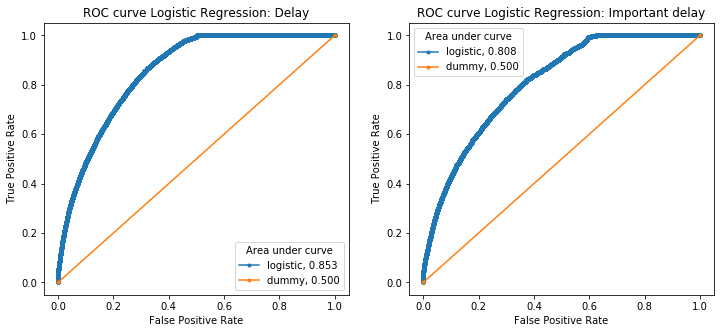

In [15]:
# ROC and AUROC
# predict probabilities
lr_probs_d = logreg_d.predict_proba(X_va_arr_reindex)
dummy_probs_d = dummy_d.predict_proba(X_va_arr_reindex)

lr_probs_i = logreg_i.predict_proba(X_va_arr_reindex)
dummy_probs_i = dummy_i.predict_proba(X_va_arr_reindex)

# check probabilities and compare to predicttions
print('Probabilities:',lr_probs_d[0:5,1])
print('Predictions:',y_pred_logreg_va_arr_d[0:5])

print('Probabilities:',lr_probs_i[0:5,1])
print('Predictions:',y_pred_logreg_va_arr_i[0:5])

# keep probabilities for the positive outcome only
lr_probs_pos_d = lr_probs_d[:,1]
dummy_probs_pos_d = dummy_probs_d[:,1]

lr_probs_pos_i = lr_probs_i[:,1]
dummy_probs_pos_i = dummy_probs_i[:,1]

# calculate scores
lr_auc_d = roc_auc_score(y_va_arr_delay_binary, lr_probs_pos_d)
dummy_auc_d = roc_auc_score(y_va_arr_delay_binary, dummy_probs_pos_d)

lr_auc_i = roc_auc_score(y_va_arr_imp_delay_binary, lr_probs_pos_i)
dummy_auc_i = roc_auc_score(y_va_arr_imp_delay_binary, dummy_probs_pos_i)

# summarize scores
print('Logistic delay: ROC AUC={:.3f}'.format(lr_auc_d))
print('Dummy delay: ROC AUC={:.3f}'.format(dummy_auc_d))

print('Logistic important delay: ROC AUC={:.3f}'.format(lr_auc_i))
print('Dummy important delay: ROC AUC={:.3f}'.format(dummy_auc_i))

# calculate roc curves
lr_fpr_d, lr_tpr_d, thres_d = roc_curve(y_va_arr_delay_binary, lr_probs_pos_d, pos_label=1)
dummy_fpr_d, dummy_tpr_d, _= roc_curve(y_va_arr_delay_binary, dummy_probs_pos_d, pos_label=1)

lr_fpr_i, lr_tpr_i, thres_i = roc_curve(y_va_arr_imp_delay_binary, lr_probs_pos_i, pos_label=1)
dummy_fpr_i, dummy_tpr_i, _= roc_curve(y_va_arr_imp_delay_binary, dummy_probs_pos_i, pos_label=1)

# plot the roc curves for both models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(lr_fpr_d, lr_tpr_d, marker='.', label='logistic, {:.3f}'.format(lr_auc_d))
ax1.plot(dummy_fpr_d, dummy_tpr_d, marker='.', label='dummy, {:.3f}'.format(dummy_auc_d))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC curve Logistic Regression: Delay')
ax1.legend(title='Area under curve')

ax2.plot(lr_fpr_i, lr_tpr_i, marker='.', label='logistic, {:.3f}'.format(lr_auc_i))
ax2.plot(dummy_fpr_i, dummy_tpr_i, marker='.', label='dummy, {:.3f}'.format(dummy_auc_i))
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC curve Logistic Regression: Important delay')
ax2.legend(title='Area under curve')

plt.show()

In [16]:
# define optimized threshold
from numpy import argmax
print('Delay')
# calculate inputs for the roc curve
lr_J_d = lr_tpr_d -lr_fpr_d
lr_bt_d = thres_d[argmax(lr_J_d)] # best threshold
print('Best Threshold: %f' % (lr_bt_d))

# use threshold in model
lr_preds_d = np.where(logreg_d.predict_proba(X_va_arr_reindex)[:,1] > lr_bt_d, 1,0)
print('Probabilities:',logreg_d.predict_proba(X_va_arr_reindex)[0:10,1])
print('Predictions:',lr_preds_d[0:10])

print('***')
print('Important delay')
# calculate inputs for the roc curve
lr_J_i= lr_tpr_i -lr_fpr_i
lr_bt_i = thres_d[argmax(lr_J_i)] # best threshold
print('Best Threshold: %f' % (lr_bt_i))

# use threshold in model
lr_preds_i = np.where(logreg_i.predict_proba(X_va_arr_reindex)[:,1] > lr_bt_i, 1,0)
print('Probabilities:',logreg_i.predict_proba(X_va_arr_reindex)[0:10,1])
print('Predictions:',lr_preds_i[0:10])

Delay
Best Threshold: 0.238755
Probabilities: [0.27350894 0.24693641 0.33556728 0.3055009  0.76082611 0.21161996
 0.65118221 0.77315453 0.40700482 0.31054733]
Predictions: [1 1 1 1 1 0 1 1 1 1]
***
Important delay
Best Threshold: 0.298757
Probabilities: [0.09997347 0.08493804 0.2455714  0.21384152 0.24596633 0.08046971
 0.21105443 0.22884169 0.14053175 0.14351464]
Predictions: [0 0 0 0 0 0 0 0 0 0]


In [17]:
print('Classification report: Logistic Regression delay - optimized threshold at {:.3f} on ROC'.format(lr_bt_d))
report_logreg_preds_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_preds_d, target_names=['no_delay','delay'])
f1_logreg_arr_d_opt = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_preds_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_logreg_preds_d)

Classification report: Logistic Regression delay - optimized threshold at 0.239 on ROC
              precision    recall  f1-score   support

    no_delay       0.95      0.68      0.79     86652
       delay       0.41      0.87      0.55     22068

    accuracy                           0.72    108720
   macro avg       0.68      0.77      0.67    108720
weighted avg       0.84      0.72      0.74    108720



In [18]:
print('Classification report: Logistic Regression important delay - optimized threshold at {:.3f} on ROC'.format(lr_bt_i))
report_logreg_preds_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=lr_preds_i, target_names=['no_delay','important_delay'])
f1_logreg_arr_i_opt = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=lr_preds_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
print(report_logreg_preds_i)

Classification report: Logistic Regression important delay - optimized threshold at 0.299 on ROC
                 precision    recall  f1-score   support

       no_delay       0.96      0.99      0.97    103481
important_delay       0.41      0.09      0.15      5239

       accuracy                           0.95    108720
      macro avg       0.68      0.54      0.56    108720
   weighted avg       0.93      0.95      0.93    108720



In [19]:
print('Logistic Regression delay optimized f1 score: {:.3f}'.format(f1_logreg_arr_d_opt))
print('Logistic Regression important delay optimized f1 score: {:.3f}'.format(f1_logreg_arr_i_opt))

Logistic Regression delay optimized f1 score: 0.553
Logistic Regression important delay optimized f1 score: 0.149


#### PR and AUPR (incl. optimized threshold) <a name='logreg_a_pr' />
*<a href=#top>Back to top</a>*

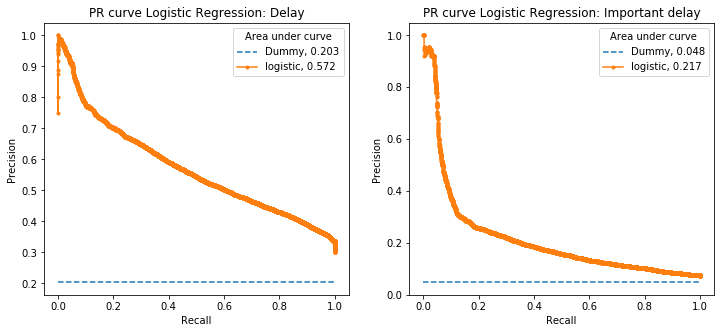

In [20]:
# Precision-Recall Curves
# predict class values
lr_precision_d, lr_recall_d, thres_pr_d = precision_recall_curve(y_va_arr_delay_binary, lr_probs_pos_d, pos_label=1)
lr_auc_pr_d = auc(lr_recall_d, lr_precision_d)

lr_precision_i, lr_recall_i, thres_pr_i = precision_recall_curve(y_va_arr_imp_delay_binary, lr_probs_pos_i, pos_label=1)
lr_auc_pr_i = auc(lr_recall_i, lr_precision_i)

# summarize scores
#print('Logistic Delay: auc={:.3f}'.format(lr_auc_pr_d))
#print('Logistic Important delay: auc={:.3f}'.format(lr_auc_pr_i))

# plot the precision-recall curves for both models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot([0,1], [(22068/108720),(22068/108720)], linestyle='--', label='Dummy, {:.3f}'.format(22068/108720))  # baseline is share of positive classes
ax1.plot(lr_recall_d, lr_precision_d, marker='.', label='logistic, {:.3f}'.format(lr_auc_pr_d))
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.legend(title='Area under curve')
ax1.set_title('PR curve Logistic Regression: Delay')

ax2.plot([0,1], [(5239/108720),(5239/108720)], linestyle='--', label='Dummy, {:.3f}'.format(5239/108720))  # baseline is share of positive classes
ax2.plot(lr_recall_i, lr_precision_i, marker='.', label='logistic, {:.3f}'.format(lr_auc_pr_i))
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(title='Area under curve')
ax2.set_title('PR curve Logistic Regression: Important delay')

plt.show()

In [21]:
print('Delay')
fscores_d = (2 * lr_precision_d * lr_recall_d) / (lr_precision_d + lr_recall_d)
lr_bt_pr_d = thres_pr_d[argmax(fscores_d)]
print('Best Threshold: {:.3f}'.format(lr_bt_pr_d))
# use threshold in model
lr_curve_d = np.where(logreg_d.predict_proba(X_va_arr_reindex)[:,1] > lr_bt_pr_d, 1,0)
print('Probabilities:',logreg_d.predict_proba(X_va_arr_reindex)[0:10,1])
print('Predictions:',lr_preds_d[0:10])

print('***')

print('Important delay')
fscores_i = (2 * lr_precision_i * lr_recall_i) / (lr_precision_i + lr_recall_i)
lr_bt_pr_i = thres_pr_i[argmax(fscores_i)]
print('Best Threshold: {:.3f}'.format(lr_bt_pr_i))
# use threshold in model
lr_curve_i = np.where(logreg_i.predict_proba(X_va_arr_reindex)[:,1] > lr_bt_pr_i, 1,0)
print('Probabilities:',logreg_i.predict_proba(X_va_arr_reindex)[0:10,1])
print('Predictions:',lr_preds_i[0:10])

Delay
Best Threshold: 0.297
Probabilities: [0.27350894 0.24693641 0.33556728 0.3055009  0.76082611 0.21161996
 0.65118221 0.77315453 0.40700482 0.31054733]
Predictions: [1 1 1 1 1 0 1 1 1 1]
***
Important delay
Best Threshold: 0.147
Probabilities: [0.09997347 0.08493804 0.2455714  0.21384152 0.24596633 0.08046971
 0.21105443 0.22884169 0.14053175 0.14351464]
Predictions: [0 0 0 0 0 0 0 0 0 0]


#### Classification report (optimized threshold) <a name='logreg_a_curves_class_report' />
*<a href=#top>Back to top</a>*

In [22]:
print('Classification report: Logistic Regression delay - optimzed threshold at {:.3f} on PR curve'.format(lr_bt_pr_d))
report_logreg_preds_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'])
f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_logreg_preds_pr_d)

Classification report: Logistic Regression delay - optimzed threshold at 0.297 on PR curve
              precision    recall  f1-score   support

    no_delay       0.93      0.75      0.83     86652
       delay       0.44      0.77      0.56     22068

    accuracy                           0.75    108720
   macro avg       0.68      0.76      0.69    108720
weighted avg       0.83      0.75      0.77    108720



In [23]:
print('Classification report: Logistic Regression importat delay - optimzed threshold at {:.3f} on PR curve'.format(lr_bt_pr_i))
report_logreg_preds_pr_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=lr_curve_i, target_names=['no_delay','important_delay'])
f1_logreg_pr_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=lr_curve_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
print(report_logreg_preds_pr_i)

Classification report: Logistic Regression importat delay - optimzed threshold at 0.147 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.97      0.93      0.95    103481
important_delay       0.21      0.34      0.26      5239

       accuracy                           0.91    108720
      macro avg       0.59      0.64      0.60    108720
   weighted avg       0.93      0.91      0.92    108720



In [24]:
print('Logistic Regression delay optimized f1 score: {:.3f}'.format(f1_logreg_pr_d))
print('Logistic Regression important delay optimized f1 score: {:.3f}'.format(f1_logreg_pr_i))

Logistic Regression delay optimized f1 score: 0.561
Logistic Regression important delay optimized f1 score: 0.256


**Comments:** *Logistic regression (a)*
* **Delay:** 
    - Basic: f1 score of 0.50 with relatively balanced performance in precision (0.57) and recall (0.44)
    - ROC: optimizing threshold (~0.24) we get to improved f1 score of 0.55 mostly from improvements in recall (0.87)
    - PR: optimizing threshold (~0.30) we get to highest f1 score of 0.56 (precision at 0.44 and recall at 0.77)
* **Important delay:** 
    - Basic: f1 score very low at 0.09 with decent precision (0.77) but bad recall (0.05) => although some important delays are possible to identify and recurring, most cases seem very hard to predict, probably a sign that there is no clear pattern to be detected in the data
    - ROC: optimizing threshold (~0.30) we improve f1 score to 0.15 (precision 0.41 and recall at 0.09)
    - PR: optimizing threshold (~0.15) we get to highest f1 score of 0.26 (precision at 0.21 and recall at 0.34)

#### b) Logistic Regression with *'class_weight = 'balanced'* (Cost sensitive learning) <a name='logreg_b' />
*<a href=#top>Back to top</a>*
* **Note:** *decide to not use over- or under-sampling for this project and focus on other technics (e.g.: class_weight, thresholds optimization, ...)*

In [25]:
logreg_cw_d = LogisticRegression(multi_class='ovr',solver='liblinear', class_weight='balanced')
logreg_cw_d.fit(X_tr_arr, y_tr_arr_delay_binary)

logreg_cw_i = LogisticRegression(multi_class='ovr',solver='liblinear', class_weight='balanced')
logreg_cw_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)


LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

#### Classification report (Logistic Regression (b)) <a name='logreg_b_class_report' />
*<a href=#top>Back to top</a>*

In [26]:
print('Classification report: Logistic Regression delay')
report_logreg_cw_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=logreg_cw_d.predict(X_va_arr_reindex), target_names=['no_delay','delay'])
f1_logreg_cw_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=logreg_cw_d.predict(X_va_arr_reindex), target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_logreg_cw_d)

print('***')

print('Classification report: Logistic Regression important delay')
report_logreg_cw_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=logreg_cw_i.predict(X_va_arr_reindex), target_names=['no_delay','important_delay'])
f1_logreg_cw_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=logreg_cw_i.predict(X_va_arr_reindex), target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
print(report_logreg_cw_i)
# interesting to see how recall has increased significantly

Classification report: Logistic Regression delay
              precision    recall  f1-score   support

    no_delay       0.96      0.66      0.78     86652
       delay       0.40      0.88      0.55     22068

    accuracy                           0.71    108720
   macro avg       0.68      0.77      0.67    108720
weighted avg       0.84      0.71      0.74    108720

***
Classification report: Logistic Regression important delay
                 precision    recall  f1-score   support

       no_delay       0.98      0.66      0.79    103481
important_delay       0.11      0.79      0.19      5239

       accuracy                           0.67    108720
      macro avg       0.54      0.72      0.49    108720
   weighted avg       0.94      0.67      0.76    108720



In [27]:
print('Logistic Regression delay "balanced" class weight f1 score: {:.3f}'.format(f1_logreg_cw_d))
print('Logistic Regression important delay "balanced" class weight f1 score: {:.3f}'.format(f1_logreg_cw_i))

Logistic Regression delay "balanced" class weight f1 score: 0.550
Logistic Regression important delay "balanced" class weight f1 score: 0.186


**Comments:** *Logistic regression (b)*
* **Delay:** 
    - class weight "balanced": f1 score of 0.55 close to performance of ROC and PR threshold improvements with especially high recall (0.88). Printing confusion matrix would show high share of false positive
* **Important delay:** 
    - class weight "balanced": f1 score of 0.19 between performance of ROC and PR threshold improvements and especially high recall (0.79): Printing confusion matrix would also show high share of false positive here

#### c) Logistic Regression with hyper-parameters tuning (using Gridsearch and cross-validation) <a name='logreg_c' />
*<a href=#top>Back to top</a>*

1. Tune hyper-parameters in GridSearch (incl. class_weight)
2. Optimize for Area Under PR curve
3. Once set of hyper-parameters selected optimize thresholds on PR curve to get best f1 score

**Notes on GridSearch:**
* **Cross-validation:** the k-fold cross-validation technique is quite efficient and effective in assessing a classifier for balanced or even slightly skewed datasets. However, it fails in case of imbalanced datasets since the training data is usually split into folds assuming a uniform probability distribution. In the case of imbalanced data, this has the potential of resulting in certain folds either completely missing out on the positive (minority) class or having very few examples of it. Accordingly, this is likely to result in misleading model evaluations. A modified k-fold cross-validation, called **stratified k-fold cross-validation**, is **more suitable for imbalanced classification problems**. **Stratified k-fold or Repeated Stratified k-fold preserves the imbalanced class distribution in each fold. In GridSearch object stratified k-fold is per default for classifiers**
* **AP (average precision):** AUPRC is not a metric available in GridSearch but AP is a very close approximation. We will be using both AUPRC and F1 scores to assess performance of combinations




#### Tuning hyperparameters with GridSearchCV (grid search and cross validation) <a name='logreg_c_delay' />
*<a href=#top>Back to top</a>*

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# merging train and validation sets for the use of cross-validation
X_tr_va = np.concatenate((X_tr_arr,X_va_arr_reindex))
y_tr_va_d = np.concatenate((y_tr_arr_delay_binary, y_va_arr_delay_binary))
y_tr_va_i = np.concatenate((y_tr_arr_imp_delay_binary, y_va_arr_imp_delay_binary))

#imgs_tr_va = np.concatenate((imgs_tr, imgs_va))
#labels_tr_va = np.concatenate((labels_tr, labels_va))

In [30]:
print('Shape train/valid input:',X_tr_va.shape)
print('Shape train/valid output:',y_tr_va_d.shape)
print('Shape train/valid output:',y_tr_va_i.shape)
#print('Shape train/valid imgs:',imgs_tr_va.shape)
#print('Shape train/valid labels:',labels_tr_va.shape)

Shape train/valid input: (323770, 434)
Shape train/valid output: (323770,)
Shape train/valid output: (323770,)


In [31]:
from sklearn.pipeline import Pipeline
# Create the estimator
logreg_tune_d = Pipeline([
    #('scaler',StandardScaler()),
    ('logistic',LogisticRegression(multi_class='ovr',solver='liblinear'))
])
logreg_tune_i = Pipeline([
    #('scaler',StandardScaler()),
    ('logistic',LogisticRegression(multi_class='ovr',solver='liblinear'))
])

# Fit on the train/validation set
print(logreg_tune_d.fit(X_tr_va,y_tr_va_d))
print(logreg_tune_i.fit(X_tr_va,y_tr_va_i))

# How can I do the same without Pipeline (as I already scaled before)

Pipeline(steps=[('logistic',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])
Pipeline(steps=[('logistic',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])


In [32]:
print(logreg_tune_d.get_params)
print(logreg_tune_i.get_params)

<bound method Pipeline.get_params of Pipeline(steps=[('logistic',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])>
<bound method Pipeline.get_params of Pipeline(steps=[('logistic',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])>


#### GridSearch (delay) <a name='logreg_c_delay_grid' />
*<a href=#top>Back to top</a>*

In [33]:
# Create grid
grid = [{
    'logistic__C':np.logspace(-4,4,3),
    'logistic__multi_class':['ovr'],
    'logistic__solver':['liblinear'],
    'logistic__class_weight':[None,'balanced']
},{
    'logistic__C':np.logspace(-4,4,3),
    'logistic__multi_class':['multinomial'],
    'logistic__solver':['saga'],
    'logistic__class_weight':[None,'balanced']
}]

# Create cross validation object
# planning to use AP (average_precision') for scoring on AUPRC (https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/)
scoring = ['precision','recall','average_precision','f1'] # replace in below GridSearchCV
# not that for classifiers the CV is per-default stratified
grid_cv_d = GridSearchCV(estimator=logreg_tune_d, param_grid=grid, n_jobs=4, cv=10, refit=False,verbose=1, return_train_score=True, scoring=['precision','recall','average_precision','f1'])
grid_cv_i = GridSearchCV(estimator=logreg_tune_i, param_grid=grid, n_jobs=4, cv=10, refit=False,verbose=1, return_train_score=True, scoring=['precision','recall','average_precision','f1'])

In [34]:
start = time.time()
grid_cv_d.fit(X_tr_va,y_tr_va_d)
end = time.time()
print(end-start)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
6775.045025587082


In [35]:
# Get the results with "cv_results"
grid_cv_d.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logistic__C', 'param_logistic__class_weight', 'param_logistic__multi_class', 'param_logistic__solver', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 'split9_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision', 'split2_train_precision', 'split3_train_precision', 'split4_train_precision', 'split5_train_precision', 'split6_train_precision', 'split7_train_precision', 'split8_train_precision', 'split9_train_precision', 'mean_train_precision', 'std_train_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'split5_test_recall', 'split6_test_recall', 'split7_test_recall'

In [36]:
grid_cv_d.cv_results_['mean_test_recall']

array([0.03139478, 0.89404944, 0.37013911, 0.86443844, 0.37078493,
       0.86415762, 0.06420756, 0.89410558, 0.37039183, 0.8643542 ,
       0.37078493, 0.86415762])

In [37]:
cols = ['mean_test_average_precision','mean_train_average_precision','std_test_average_precision',\
        'mean_test_f1','mean_train_f1',\
        'mean_test_recall','mean_train_recall','mean_test_precision','mean_train_precision',\
        'param_logistic__C','param_logistic__multi_class','param_logistic__class_weight',\
        'mean_fit_time','mean_score_time']
# Delay GridSearchCV
grid_cv_df_d = pd.DataFrame(grid_cv_d.cv_results_)[cols].sort_values(by='mean_test_average_precision', ascending=False)
grid_cv_df_d

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_logistic__C,param_logistic__multi_class,param_logistic__class_weight,mean_fit_time,mean_score_time
4,0.552158,0.621584,0.044233,0.446960,0.498237,0.370785,0.406140,0.576028,0.644511,10000,ovr,None,31.540013,0.162915
10,0.552151,0.621583,0.044227,0.446960,0.498243,0.370785,0.406153,0.576028,0.644497,10000,multinomial,None,454.693050,0.149548
8,0.552107,0.621562,0.044242,0.446662,0.498067,0.370392,0.405855,0.575963,0.644654,1,multinomial,None,650.182732,0.165038
5,0.552082,0.620002,0.043591,0.559694,0.589026,0.864158,0.895812,0.415141,0.438785,10000,ovr,balanced,57.300735,0.218698
11,0.552075,0.619998,0.043585,0.559686,0.589023,0.864158,0.895827,0.415133,0.438779,10000,multinomial,balanced,440.055366,0.142646
2,0.552053,0.621543,0.044270,0.446551,0.497929,0.370139,0.405589,0.576312,0.644860,1,ovr,None,21.891480,0.195644
9,0.552022,0.619968,0.043595,0.559685,0.588995,0.864354,0.896026,0.415088,0.438700,1,multinomial,balanced,765.565338,0.186003
3,0.551951,0.619945,0.043618,0.559613,0.589003,0.864438,0.896173,0.414985,0.438673,1,ovr,balanced,21.163220,0.173946
6,0.415755,0.484944,0.048020,0.111040,0.128215,0.064208,0.071431,0.474121,0.635752,0.0001,multinomial,None,102.283463,0.164113
7,0.413993,0.480634,0.046494,0.532246,0.547762,0.894106,0.923852,0.379321,0.389302,0.0001,multinomial,balanced,83.889079,0.136795


**Comments on GridSearchCV - Delay:**
* Many results with AP at 0.55, from those some with stronger f1 score at 0.56 which have high recall. Also taking into account 'fit time' when similar results
* Based on above comments deciding to go with (5) following parameters:
    * multi_class: ovr
    * class_weight: balanced
    * C: 1000 (could try slightly lower)

In [38]:
# creating final LogisticRegression
logreg_tuned_final_d = LogisticRegression(C=1000, multi_class='ovr', class_weight='balanced', solver='liblinear')
# fit
logreg_tuned_final_d.fit(X_tr_arr, y_tr_arr_delay_binary)
# predict
lr_tuned_final_pred_d = logreg_tuned_final_d.predict(X_va_arr_reindex)
# predict probabilities
lr_tuned_probs_d = logreg_tuned_final_d.predict_proba(X_va_arr_reindex)
# check probabilities and compare to predicttions
print('Probabilities:',lr_tuned_probs_d[0:5,1])
print('Predictions:',lr_tuned_final_pred_d[0:5])
# keep probabilities for the positive outcome only
lr_tuned_probs_pos_d = lr_tuned_probs_d[:,1]

lr_precision_tuned_d, lr_recall_tuned_d, thres_tuned_pr_d = precision_recall_curve(y_va_arr_delay_binary, lr_tuned_probs_pos_d, pos_label=1)
lr_tuned_auc_pr_d = auc(lr_recall_tuned_d, lr_precision_tuned_d)
print('Area Under PR Curve: {:.3f}'.format(lr_tuned_auc_pr_d))

Probabilities: [0.56535422 0.53189748 0.64550162 0.61400207 0.91730315]
Predictions: [1 1 1 1 1]
Area Under PR Curve: 0.570


#### Best threshold calculation <a name='logreg_c_delay_thres' />
*<a href=#top>Back to top</a>*

In [39]:
fscores_tuned_d = (2 * lr_precision_tuned_d * lr_recall_tuned_d) / (lr_precision_tuned_d + lr_recall_tuned_d)
lr_bt_tuned_pr_d = thres_tuned_pr_d[argmax(fscores_tuned_d)]
print('Best Threshold: {:.3f}'.format(lr_bt_tuned_pr_d))
# use threshold in model
lr_tuned_curve_d = np.where(logreg_tuned_final_d.predict_proba(X_va_arr_reindex)[:,1] > lr_bt_tuned_pr_d, 1,0)
print('Probabilities:',logreg_tuned_final_d.predict_proba(X_va_arr_reindex)[0:10,1])
print('Predictions:',lr_tuned_curve_d[0:10])

Best Threshold: 0.594
Probabilities: [0.56535422 0.53189748 0.64550162 0.61400207 0.91730315 0.47913815
 0.86809157 0.9221443  0.70394967 0.59859178]
Predictions: [0 0 1 1 1 0 1 1 1 1]


#### Classification report <a name='logreg_c_delay_report' />
*<a href=#top>Back to top</a>*

In [40]:
print('Classification report: Logistic Regression delay - optimzed threshold at {:.3f} on PR curve'.format(lr_bt_tuned_pr_d))
report_logreg_preds_tuned_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_tuned_curve_d, target_names=['no_delay','delay'])
#f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_logreg_preds_tuned_pr_d)

Classification report: Logistic Regression delay - optimzed threshold at 0.594 on PR curve
              precision    recall  f1-score   support

    no_delay       0.93      0.75      0.83     86652
       delay       0.44      0.77      0.56     22068

    accuracy                           0.76    108720
   macro avg       0.69      0.76      0.70    108720
weighted avg       0.83      0.76      0.78    108720



**Note:** Got slightly better f1-score with (ii) balanced but much lower recall. Ok to trade-off for higher recall

### Important delay <a name='logreg_c_imp_delay' /><a name='logreg_c_imp_delay_grid' />
*<a href=#top>Back to top</a>*

In [41]:
start = time.time()
grid_cv_i.fit(X_tr_va,y_tr_va_i)
end = time.time()
print(end-start)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
6089.134136915207


In [42]:
# use same columns as above
# Important delay GridSearchCV
grid_cv_df_i = pd.DataFrame(grid_cv_i.cv_results_)[cols].sort_values(by='mean_test_average_precision', ascending=False)
grid_cv_df_i

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_logistic__C,param_logistic__multi_class,param_logistic__class_weight,mean_fit_time,mean_score_time
10,0.204887,0.266600,0.054933,0.094164,0.102085,0.051589,0.054347,0.657344,0.845221,10000,multinomial,None,407.314298,0.131594
4,0.204876,0.266605,0.054946,0.094164,0.102085,0.051589,0.054347,0.657344,0.845221,10000,ovr,None,26.393216,0.191900
8,0.204848,0.266548,0.054867,0.094333,0.101764,0.051650,0.054165,0.663694,0.845274,1,multinomial,None,406.623689,0.140775
2,0.204764,0.266504,0.054780,0.094147,0.101243,0.051528,0.053868,0.665009,0.845803,1,ovr,None,14.204667,0.173727
5,0.197163,0.253391,0.055819,0.182289,0.212806,0.778442,0.848012,0.103337,0.121674,10000,ovr,balanced,85.101367,0.218964
3,0.197086,0.253277,0.055680,0.182233,0.212799,0.778685,0.848154,0.103297,0.121666,1,ovr,balanced,24.078090,0.190684
11,0.182434,0.185501,0.056034,0.197487,0.199752,0.632919,0.649644,0.126577,0.123732,10000,multinomial,balanced,404.090964,0.150601
9,0.158580,0.182647,0.042398,0.164599,0.196865,0.637849,0.684562,0.099507,0.121273,1,multinomial,balanced,462.361673,0.141590
7,0.126338,0.163164,0.023031,0.161955,0.183370,0.789440,0.852772,0.090423,0.102914,0.0001,multinomial,balanced,413.333821,0.142823
1,0.118499,0.145406,0.028762,0.162537,0.178731,0.784572,0.841004,0.090711,0.099991,0.0001,ovr,balanced,6.852943,0.181055


**Comments on GridSearchCV - Important delay:**
* 4 results with AP around 0.20 but 2 with much higher f1 scores (0.18) driven but higher recall over lower precision. Decide to go for more recall and take 'fit time' time into consideration.
* Based on above comments deciding to go with (3) following parameters:
    * multi_class: ovr
    * class_weight: balanced
    * C: 1

In [43]:
# creating final LogisticRegression
logreg_tuned_final_i = LogisticRegression(C=1, multi_class='ovr', class_weight='balanced', solver='liblinear')
# fit
logreg_tuned_final_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)
# predict
lr_tuned_final_pred_i = logreg_tuned_final_i.predict(X_va_arr_reindex)
# predict probabilities
lr_tuned_probs_i = logreg_tuned_final_i.predict_proba(X_va_arr_reindex)
# check probabilities and compare to predicttions
print('Probabilities:',lr_tuned_probs_i[0:5,1])
print('Predictions:',lr_tuned_final_pred_i[0:5])
# keep probabilities for the positive outcome only
lr_tuned_probs_pos_i = lr_tuned_probs_i[:,1]

lr_precision_tuned_i, lr_recall_tuned_i, thres_tuned_pr_i = precision_recall_curve(y_va_arr_imp_delay_binary, lr_tuned_probs_pos_i, pos_label=1)
lr_tuned_auc_pr_i = auc(lr_recall_tuned_i, lr_precision_tuned_i)
print('Area Under PR Curve: {:.3f}'.format(lr_tuned_auc_pr_i))

Probabilities: [0.7131021  0.68916419 0.87460035 0.86152064 0.84779204]
Predictions: [1 1 1 1 1]
Area Under PR Curve: 0.206


#### Best threshold (important delay) <a name='logreg_c_imp_delay_thres' />
*<a href=#top>Back to top</a>*

In [44]:
fscores_tuned_i = (2 * lr_precision_tuned_i * lr_recall_tuned_i) / (lr_precision_tuned_i + lr_recall_tuned_i)
print(fscores_tuned_i)
lr_bt_tuned_pr_i = thres_tuned_pr_i[argmax(fscores_tuned_i)]
print('Best Threshold: {:.3f}'.format(lr_bt_tuned_pr_i))
# use threshold in model
lr_tuned_curve_i = np.where(logreg_tuned_final_i.predict_proba(X_va_arr_reindex)[:,1] > lr_bt_tuned_pr_i, 1,0)
print('Probabilities:',logreg_tuned_final_i.predict_proba(X_va_arr_reindex)[0:10,1])
print('Predictions:',lr_tuned_curve_i[0:10])

[0.14017579 0.14015653 0.14015841 ... 0.00076321 0.00038168 0.        ]
Best Threshold: 0.768
Probabilities: [0.7131021  0.68916419 0.87460035 0.86152064 0.84779204 0.61206968
 0.82413082 0.83835988 0.72494576 0.71871122]
Predictions: [0 0 1 1 1 0 1 1 0 0]


#### Classification report (important delay) <a name='logreg_c_imp_delay_report' />
*<a href=#top>Back to top</a>*

In [45]:
print('Classification report: Logistic Regression delay - optimzed threshold at {:.3f} on PR curve'.format(lr_bt_tuned_pr_i))
report_logreg_preds_tuned_pr_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=lr_tuned_curve_i, target_names=['no_delay','important_delay'])
#f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_logreg_preds_tuned_pr_i)

Classification report: Logistic Regression delay - optimzed threshold at 0.768 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.96      0.94      0.95    103481
important_delay       0.20      0.31      0.25      5239

       accuracy                           0.91    108720
      macro avg       0.58      0.62      0.60    108720
   weighted avg       0.93      0.91      0.92    108720



**Note:** Strong performance very similar to (ii) balanced, interesting to have high recall

#### Performance on test set (Logistic regression) <a name='logreg_test' />
*<a href=#top>Back to top</a>*

In [46]:
# delay
# area under precision-recall curve test
lr_test_probs_pos_d = logreg_tuned_final_d.predict_proba(X_te_arr_reindex)[:,1]
lr_precision_test_d, lr_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, lr_test_probs_pos_d, pos_label=1)
lr_test_auc_pr_d = auc(lr_recall_test_d, lr_precision_test_d)
print('Area Under PR Curve: {:.3f}'.format(lr_test_auc_pr_d))
# use threshold in model
lr_test_d = np.where(logreg_tuned_final_d.predict_proba(X_te_arr_reindex)[:,1] > lr_bt_tuned_pr_d, 1,0)
print('Probabilities:',logreg_tuned_final_d.predict_proba(X_te_arr_reindex)[0:10,1])
print('Predictions:',lr_test_d[0:10])
print('Classification report: Logistic Regression delay TEST - optimzed threshold at {:.3f} on PR curve'.format(lr_bt_tuned_pr_d))
report_logreg_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=lr_test_d, target_names=['no_delay','delay'])
f1_logreg_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=lr_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
precision_logreg_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=lr_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['precision']
recall_logreg_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=lr_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['recall']
print(report_logreg_test_d)

Area Under PR Curve: 0.652
Probabilities: [0.56535422 0.53189748 0.64550162 0.61400207 0.91730315 0.47913815
 0.86809157 0.9221443  0.70394967 0.59859178]
Predictions: [0 0 1 1 1 0 1 1 1 1]
Classification report: Logistic Regression delay TEST - optimzed threshold at 0.594 on PR curve
              precision    recall  f1-score   support

    no_delay       0.90      0.79      0.84     80088
       delay       0.55      0.76      0.64     27278

    accuracy                           0.78    107366
   macro avg       0.73      0.77      0.74    107366
weighted avg       0.81      0.78      0.79    107366



In [47]:
# important delay
# area under precision-recall curve test
lr_test_probs_pos_i = logreg_tuned_final_i.predict_proba(X_te_arr_reindex)[:,1]
lr_precision_test_i, lr_recall_test_i, _ = precision_recall_curve(y_te_arr_imp_delay_binary, lr_test_probs_pos_i, pos_label=1)
lr_test_auc_pr_i = auc(lr_recall_test_i, lr_precision_test_i)
print('Area Under PR Curve: {:.3f}'.format(lr_test_auc_pr_i))
# use threshold in model
lr_test_i = np.where(logreg_tuned_final_i.predict_proba(X_te_arr_reindex)[:,1] > lr_bt_tuned_pr_i, 1,0)
print('Probabilities:',logreg_tuned_final_i.predict_proba(X_te_arr_reindex)[0:10,1])
print('Predictions:',lr_test_i[0:10])
print('Classification report: Logistic Regression important delay TEST - optimzed threshold at {:.3f} on PR curve'.format(lr_bt_tuned_pr_i))
report_logreg_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=lr_test_i, target_names=['no_delay','important_delay'])
f1_logreg_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=lr_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_logreg_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=lr_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_logreg_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=lr_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_logreg_test_i)

Area Under PR Curve: 0.270
Probabilities: [0.7131021  0.68916419 0.87460035 0.86152064 0.84779204 0.61206968
 0.82413082 0.83835988 0.72494576 0.71871122]
Predictions: [0 0 1 1 1 0 1 1 0 0]
Classification report: Logistic Regression important delay TEST - optimzed threshold at 0.768 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.95      0.94      0.95    100362
important_delay       0.28      0.32      0.30      7004

       accuracy                           0.90    107366
      macro avg       0.62      0.63      0.62    107366
   weighted avg       0.91      0.90      0.91    107366



### ii) k-NN (decided to not tune classifier for comparative analysis due to computation power) <a name='knn' />
*<a href=#top>Back to top</a>*

In [48]:
from sklearn.neighbors import KNeighborsClassifier

#### Delay <a name='knn_delay' />
*<a href=#top>Back to top</a>*

In [54]:
start_knn = time.time()
# create classifier
knn_d = KNeighborsClassifier()

# fit
knn_d.fit(X_tr_arr, y_tr_arr_delay_binary)
#logreg_i.fit(X_tr_arr, y_tr_arr_imp_delay)

# evaluate
score_knn_arr_d = knn_d.score(X_va_arr_reindex, y_va_arr_delay_binary)

y_pred_knn_va_arr_d = knn_d.predict(X_va_arr_reindex) # prediction delay
precision_knn_arr_d = precision_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_knn_va_arr_d, pos_label=1)
recall_knn_arr_d = recall_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_knn_va_arr_d, pos_label=1)
f1_knn_arr_d = f1_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_knn_va_arr_d, pos_label=1)

# print
print('k-NN: delay')
#print('Score k-NN delay: {:.4f}'.format(score_knn_arr_d))
print('Precision k-NN delay: {:.4f}'.format(precision_knn_arr_d))
print('Recall k-NN delay: {:.4f}'.format(recall_knn_arr_d))
print('F1 score k-NN delay: {:.4f}'.format(f1_knn_arr_d))

end_knn = time.time()
print(end_knn - start_knn)

k-NN: delay
Precision k-NN delay: 0.5079
Recall k-NN delay: 0.4928
F1 score k-NN delay: 0.5003
1349.2175543308258


In [55]:
# Confusion matrix 'k-NN delay'
matrix_knn_d = confusion_matrix(y_true=y_va_arr_delay_binary, y_pred=y_pred_knn_va_arr_d,normalize='all') # normalize either on columns/rows or all
matrix_knn_d = pd.DataFrame(
    matrix_knn_d, 
    columns=['pred: delay', 'pred: no delay'],
    index=['true: delay', 'true: no delay']
)
print('Confusion matrix (normalized): k-NN delay')
matrix_knn_d

Confusion matrix (normalized): k-NN delay


,pred: delay,pred: no delay
true: delay,0.700101,0.096919
true: no delay,0.102943,0.100037


In [56]:
print('Classification report: k-NN delay')
report_knn_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=y_pred_knn_va_arr_d)
print(report_knn_d)

Classification report: k-NN delay
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     86652
           1       0.51      0.49      0.50     22068

    accuracy                           0.80    108720
   macro avg       0.69      0.69      0.69    108720
weighted avg       0.80      0.80      0.80    108720



#### Important delay <a name='knn_imp_delay' />
*<a href=#top>Back to top</a>*

In [57]:
start_knn_i = time.time()
# create classifier
knn_i = KNeighborsClassifier()

# fit
knn_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)
#logreg_i.fit(X_tr_arr, y_tr_arr_imp_delay)

# evaluate
score_knn_arr_i = knn_i.score(X_va_arr_reindex, y_va_arr_imp_delay_binary)

y_pred_knn_va_arr_i = knn_i.predict(X_va_arr_reindex) # prediction delay
precision_knn_arr_i = precision_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_knn_va_arr_i, pos_label=1)
recall_knn_arr_i = recall_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_knn_va_arr_i, pos_label=1)
f1_knn_arr_i = f1_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_knn_va_arr_i, pos_label=1)

# print
print('k-NN: delay')
#print('Score k-NN delay: {:.4f}'.format(score_knn_arr_d))
print('Precision k-NN delay: {:.4f}'.format(precision_knn_arr_i))
print('Recall k-NN delay: {:.4f}'.format(recall_knn_arr_i))
print('F1 score k-NN delay: {:.4f}'.format(f1_knn_arr_i))

end_knn_i = time.time()
print(end_knn_i - start_knn_i)

k-NN: delay
Precision k-NN delay: 0.3639
Recall k-NN delay: 0.1210
F1 score k-NN delay: 0.1816
21470.36544728279


In [58]:
# Confusion matrix 'k-NN important delay'
matrix_knn_i = confusion_matrix(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_knn_va_arr_i,normalize='all') # normalize either on columns/rows or all
matrix_knn_i = pd.DataFrame(
    matrix_knn_i, 
    columns=['pred: no delay', 'pred: important delay'],
    index=['true: no delay', 'true: important delay']
)
print('Confusion matrix (normalized): k-NN important delay')
matrix_knn_i

Confusion matrix (normalized): k-NN important delay


,pred: no delay,pred: important delay
true: no delay,0.941621,0.010191
true: important delay,0.042357,0.005831


In [59]:
print('Classification report: k-NN important delay')
report_knn_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_knn_va_arr_i)
print(report_knn_i)

Classification report: k-NN important delay
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    103481
           1       0.36      0.12      0.18      5239

    accuracy                           0.95    108720
   macro avg       0.66      0.56      0.58    108720
weighted avg       0.93      0.95      0.93    108720



**Comments:**
* Takes too long to run due to "Curse of dimensionality" issue, 1 hour without tuning. Decide not to try optimized as we use too many ressource without potentially improving performance
* Alternative I have thought of:
    * A-NN: seems in theory to better perform on large data sets but "Curse of dimensionality" would still apply ([knn to be replaced by ann](https://pub.towardsai.net/knn-k-nearest-neighbors-is-dead-fc16507eb3e))
    * PCA: also sub-optimal for categorical variables (also thought about other dimensionality reduction technics like ['Prince package'](https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1))

#### Performance on test set (k-NN) <a name='knn_test' />
*<a href=#top>Back to top</a>*

In [265]:
# delay
y_pred_knn_d = knn_d.predict(X_te_arr_reindex) # prediction delay
precision_knn_d = precision_score(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d, pos_label=1)
recall_knn_d = recall_score(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d, pos_label=1)
f1_knn_d = f1_score(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d, pos_label=1)

# print
print('k-NN: delay')
#print('Score k-NN delay: {:.4f}'.format(score_knn_arr_d))
print('Precision k-NN delay: {:.4f}'.format(precision_knn_d))
print('Recall k-NN delay: {:.4f}'.format(recall_knn_d))
print('F1 score k-NN delay: {:.4f}'.format(f1_knn_d))

knn_test_probs_pos_d = knn_d.predict_proba(X_te_arr_reindex)[:,1]
knn_precision_test_d, knn_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, knn_test_probs_pos_d, pos_label=1)
knn_test_auc_pr_d = auc(knn_recall_test_d, knn_precision_test_d)
print('Area Under PR Curve: {:.3f}'.format(knn_test_auc_pr_d))

print('Classification report: k-NN delay')
# below are duplicates from above but consistant with calculation from other classifiers
report_knn_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d)
f1_knn_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
precision_knn_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d, target_names=['no_delay','delay'], output_dict=True)['delay']['precision']
recall_knn_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_knn_d, target_names=['no_delay','delay'], output_dict=True)['delay']['recall']
print(report_knn_test_d)

k-NN: delay
Precision k-NN delay: 0.6116
Recall k-NN delay: 0.4787
F1 score k-NN delay: 0.5371
Area Under PR Curve: 0.610
Classification report: k-NN delay
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     80088
           1       0.61      0.48      0.54     27278

    accuracy                           0.79    107366
   macro avg       0.72      0.69      0.70    107366
weighted avg       0.78      0.79      0.78    107366



In [266]:
# important delay
y_pred_knn_i = knn_i.predict(X_te_arr_reindex) # prediction delay
precision_knn_i = precision_score(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i, pos_label=1)
recall_knn_i = recall_score(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i, pos_label=1)
f1_knn_i = f1_score(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i, pos_label=1)

# print
print('k-NN: important delay')
#print('Score k-NN delay: {:.4f}'.format(score_knn_arr_d))
print('Precision k-NN important delay: {:.4f}'.format(precision_knn_i))
print('Recall k-NN important delay: {:.4f}'.format(recall_knn_i))
print('F1 score k-NN important delay: {:.4f}'.format(f1_knn_i))

knn_test_probs_pos_i = knn_i.predict_proba(X_te_arr_reindex)[:,1]
knn_precision_test_i, knn_recall_test_i, _ = precision_recall_curve(y_te_arr_imp_delay_binary, knn_test_probs_pos_i, pos_label=1)
knn_test_auc_pr_i = auc(knn_recall_test_i, knn_precision_test_i)
print('Area Under PR Curve: {:.3f}'.format(knn_test_auc_pr_i))

print('Classification report: k-NN important delay')
# below are duplicates from above but consistant with calculation from other classifiers
report_knn_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i)
f1_knn_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_knn_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_knn_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_knn_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_knn_test_i)

k-NN: important delay
Precision k-NN important delay: 0.4074
Recall k-NN important delay: 0.1015
F1 score k-NN important delay: 0.1625
Area Under PR Curve: 0.223
Classification report: k-NN important delay
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    100362
           1       0.41      0.10      0.16      7004

    accuracy                           0.93    107366
   macro avg       0.67      0.55      0.56    107366
weighted avg       0.91      0.93      0.91    107366



### iii) SVMs (support vector Machine) <a name='svms' />
*<a href=#top>Back to top</a>*
* Linear (Delay and Important delay)
* RBF (too slow, decided to not include classifier in anaylsis)

In [62]:
from sklearn.svm import LinearSVC # don't 'predict_proba()'
from sklearn.svm import SVC # accepts 'predict_proba()', but very slow with current data set
from sklearn.calibration import CalibratedClassifierCV # use with LinearSVC to have 'predict_proba()'

#### Linear SVM (Delay) <a name='svm_lin' /><a name='svm_delay' />
*<a href=#top>Back to top</a>*
##### Grid search using loop <a name='svm_delay_loop' />

In [63]:
#for i in tqdm(range(0, 100), desc ="Text You Want"):
#    sleep(.1)
#print('done')

Cs  = [0.001, 0.01, 0.1, 1, 10, 100]
class_weight = [None,'balanced']

linear_results = []
for c in Cs:
    for cw in class_weight:
        #svc_d = SVC(C=c, class_weight=cw, kernel='linear')
        svc_lin = LinearSVC(C=c, class_weight=cw)
        svc_d = CalibratedClassifierCV(svc_lin)
        # fit
        svc_d.fit(X_tr_arr, y_tr_arr_delay_binary)
        # predict
        y_pred_svc_va_arr_d = svc_d.predict(X_va_arr_reindex) # validation
        y_pred_svc_tr_arr_d = svc_d.predict(X_tr_arr) # train
        # predict probabilities
        svc_va_probs_d = svc_d.predict_proba(X_va_arr_reindex) # validation
        svc_tr_probs_d = svc_d.predict_proba(X_tr_arr) # train
        # keep probabilities for the positive outcome only
        svc_va_probs_pos_d = svc_va_probs_d[:,1] # validation
        svc_tr_probs_pos_d = svc_tr_probs_d[:,1] # train
        # calculate precission and recall
        svc_va_precision_d, svc_va_recall_d, _ = precision_recall_curve(y_va_arr_delay_binary, svc_va_probs_pos_d, pos_label=1) # validation
        svc_tr_precision_d, svc_tr_recall_d, _ = precision_recall_curve(y_tr_arr_delay_binary, svc_tr_probs_pos_d, pos_label=1) # train
        # calculate auprc
        svc_va_auprc_d = auc(svc_va_recall_d, svc_va_precision_d) # validation
        svc_tr_auprc_d = auc(svc_tr_recall_d, svc_tr_precision_d) # train
        
        linear_results.append({
            'C':c,
            'Class_weight':cw,
            'auprc_valid':svc_va_auprc_d,
            'auprc_train':svc_tr_auprc_d,
            'f1_score_valid':f1_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_svc_va_arr_d, pos_label=1),
            'f1_score_train':f1_score(y_true=y_tr_arr_delay_binary, y_pred=y_pred_svc_tr_arr_d, pos_label=1),
            'recall_valid': recall_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_svc_va_arr_d, pos_label=1),
            'recall_train': recall_score(y_true=y_tr_arr_delay_binary, y_pred=y_pred_svc_tr_arr_d, pos_label=1),
            'precision_valid': precision_score(y_true=y_va_arr_delay_binary, y_pred=y_pred_svc_va_arr_d, pos_label=1),
            'precision_train': precision_score(y_true=y_tr_arr_delay_binary, y_pred=y_pred_svc_tr_arr_d, pos_label=1)
        })
        print('C:',c,'class weight:',cw,'auprc_valid',svc_va_auprc_d)


C: 0.001 class weight: None auprc_valid 0.5621938611743411
C: 0.001 class weight: balanced auprc_valid 0.5561051449399246
C: 0.01 class weight: None auprc_valid 0.5704918333337253
C: 0.01 class weight: balanced auprc_valid 0.56462618249401
C: 0.1 class weight: None auprc_valid 0.5713425828468711
C: 0.1 class weight: balanced auprc_valid 0.5655830949513916
C: 1 class weight: None auprc_valid 0.5713760332406144


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 1 class weight: balanced auprc_valid 0.5656395001235871


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 10 class weight: None auprc_valid 0.5714835223604716


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 10 class weight: balanced auprc_valid 0.5629977773134216


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 100 class weight: None auprc_valid 0.5536324428153062


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 100 class weight: balanced auprc_valid 0.5492368433434655


In [64]:
linear_results_df = pd.DataFrame(linear_results).sort_values(by='auprc_valid', ascending=False)
linear_results_df.head(10)

,C,Class_weight,auprc_train,auprc_valid,f1_score_train,f1_score_valid,precision_train,precision_valid,recall_train,recall_valid
8,10.000,None,0.638223,0.571484,0.514066,0.488407,0.654085,0.577976,0.423424,0.422875
6,1.000,None,0.638352,0.571376,0.516003,0.491052,0.651016,0.576392,0.427371,0.427723
4,0.100,None,0.638318,0.571343,0.516346,0.491299,0.651401,0.576662,0.427676,0.427950
2,0.010,None,0.637601,0.570492,0.514369,0.490219,0.651447,0.577566,0.424950,0.425820
7,1.000,balanced,0.633464,0.565640,0.528361,0.498998,0.640769,0.566826,0.449506,0.445668
5,0.100,balanced,0.633420,0.565583,0.528498,0.499036,0.640716,0.566705,0.449729,0.445804
3,0.010,balanced,0.632594,0.564626,0.527813,0.498999,0.639985,0.566388,0.449099,0.445940
9,10.000,balanced,0.632487,0.562998,0.530365,0.501423,0.637371,0.564374,0.454124,0.451106
0,0.001,None,0.629291,0.562194,0.503620,0.481256,0.653428,0.580480,0.409692,0.411002
1,0.001,balanced,0.624115,0.556105,0.512704,0.486877,0.642498,0.569996,0.426537,0.424914


In [65]:
svc_final_d = CalibratedClassifierCV(LinearSVC(C=1 , class_weight=None))
# fit
svc_final_d.fit(X_tr_arr, y_tr_arr_delay_binary)
# predict
y_pred_svc_final_d = svc_final_d.predict(X_va_arr_reindex)
# predict probabilities
svc_final_probs_d = svc_final_d.predict_proba(X_va_arr_reindex)
# keep probabilities for the positive outcome only
svc_final_probs_pos_d = svc_final_probs_d[:,1]
# Precision-recall curve metrics
svc_precision_final_d, svc_recall_final_d, svc_thres_final_d = precision_recall_curve(y_va_arr_delay_binary, svc_final_probs_pos_d, pos_label=1)
svc_final_auprc_d = auc(svc_recall_final_d, svc_precision_final_d)
print('Area Under PR Curve: {:.3f}'.format(svc_final_auprc_d))

Area Under PR Curve: 0.571


##### Best threshold (Linear SVM - Delay) <a name='svm_delay_thres' />
*<a href=#top>Back to top</a>*

In [66]:
from numpy import argmax
fscores_svc_d = (2 * svc_precision_final_d * svc_recall_final_d) / (svc_precision_final_d + svc_recall_final_d)
svc_bt_d = svc_thres_final_d[argmax(fscores_svc_d)]
print('Best Threshold: {:.3f}'.format(svc_bt_d))
# use threshold in model
svc_final_curve_d = np.where(svc_final_probs_d[:,1] > svc_bt_d, 1,0)
print('Probabilities:',svc_final_probs_d[0:10,1])
print('Predictions:',svc_final_curve_d[0:10])

Best Threshold: 0.284
Probabilities: [0.2329558  0.21055468 0.29083123 0.26459183 0.79053612 0.18808951
 0.67454621 0.80348959 0.37042526 0.26811565]
Predictions: [0 0 1 0 1 0 1 1 1 0]


##### Classification report (Linear SVM - Delay) <a name='svm_delay_report' />
*<a href=#top>Back to top</a>*

In [67]:
print('Classification report: SVC Linear delay - optimzed threshold at {:.3f} on PR curve'.format(svc_bt_d))
report_svc_preds_final_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=svc_final_curve_d, target_names=['no_delay','delay'])
#f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_svc_preds_final_pr_d)

Classification report: SVC Linear delay - optimzed threshold at 0.284 on PR curve
              precision    recall  f1-score   support

    no_delay       0.92      0.77      0.84     86652
       delay       0.45      0.73      0.56     22068

    accuracy                           0.77    108720
   macro avg       0.69      0.75      0.70    108720
weighted avg       0.83      0.77      0.78    108720



#### Linear SVM (Important delay) <a name='svm_imp_delay' />
*<a href=#top>Back to top</a>*
#### Grid search using loop <a name='svm_imp_delay_loop' />

In [68]:
#for i in tqdm(range(0, 100), desc ="Text You Want"):
#    sleep(.1)
#print('done')

Cs  = [0.001, 0.01, 0.1, 1, 10, 100]
class_weight = [None,'balanced']

linear_results_i = []
for c in Cs:
    for cw in class_weight:
        #svc_d = SVC(C=c, class_weight=cw, kernel='linear')
        svc_lin_i = LinearSVC(C=c, class_weight=cw)
        svc_i = CalibratedClassifierCV(svc_lin_i)
        # fit
        svc_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)
        # predict
        y_pred_svc_va_arr_i = svc_i.predict(X_va_arr_reindex) # validation
        y_pred_svc_tr_arr_i = svc_i.predict(X_tr_arr) # train
        # predict probabilities
        svc_va_probs_i = svc_i.predict_proba(X_va_arr_reindex) # validation
        svc_tr_probs_i = svc_i.predict_proba(X_tr_arr) # train
        # keep probabilities for the positive outcome only
        svc_va_probs_pos_i = svc_va_probs_i[:,1] # validation
        svc_tr_probs_pos_i = svc_tr_probs_i[:,1] # train
        # calculate precission and recall
        svc_va_precision_i, svc_va_recall_i, _ = precision_recall_curve(y_va_arr_imp_delay_binary, svc_va_probs_pos_i, pos_label=1) # validation
        svc_tr_precision_i, svc_tr_recall_i, _ = precision_recall_curve(y_tr_arr_imp_delay_binary, svc_tr_probs_pos_i, pos_label=1) # train
        # calculate auprc
        svc_va_auprc_i = auc(svc_va_recall_i, svc_va_precision_i) # validation
        svc_tr_auprc_i = auc(svc_tr_recall_i, svc_tr_precision_i) # train
        
        linear_results_i.append({
            'C':c,
            'Class_weight':cw,
            'auprc_valid':svc_va_auprc_i,
            'auprc_train':svc_tr_auprc_i,
            'f1_score_valid':f1_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_svc_va_arr_i, pos_label=1),
            'f1_score_train':f1_score(y_true=y_tr_arr_imp_delay_binary, y_pred=y_pred_svc_tr_arr_i, pos_label=1),
            'recall_valid': recall_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_svc_va_arr_i, pos_label=1),
            'recall_train': recall_score(y_true=y_tr_arr_imp_delay_binary, y_pred=y_pred_svc_tr_arr_i, pos_label=1),
            'precision_valid': precision_score(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_svc_va_arr_i, pos_label=1),
            'precision_train': precision_score(y_true=y_tr_arr_imp_delay_binary, y_pred=y_pred_svc_tr_arr_i, pos_label=1)
        })
        print('C:',c,'class weight:',cw,'auprc_valid',svc_va_auprc_i)


C: 0.001 class weight: None auprc_valid 0.2110644718267538
C: 0.001 class weight: balanced auprc_valid 0.18944952245373603
C: 0.01 class weight: None auprc_valid 0.21500971202279331
C: 0.01 class weight: balanced auprc_valid 0.20053616332773117
C: 0.1 class weight: None auprc_valid 0.21569242637452726
C: 0.1 class weight: balanced auprc_valid 0.2026441757679611
C: 1 class weight: None auprc_valid 0.21569326362997177


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 1 class weight: balanced auprc_valid 0.20292878690166027


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 10 class weight: None auprc_valid 0.21364852641646473


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 10 class weight: balanced auprc_valid 0.21132059493766522


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 100 class weight: None auprc_valid 0.18355209756048838


C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

C: 100 class weight: balanced auprc_valid 0.20608632860449883


In [69]:
linear_results_i_df = pd.DataFrame(linear_results_i).sort_values(by='auprc_valid', ascending=False)
linear_results_i_df.head(10)

,C,Class_weight,auprc_train,auprc_valid,f1_score_train,f1_score_valid,precision_train,precision_valid,recall_train,recall_valid
6,1.000,None,0.276136,0.215693,0.113478,0.095920,0.849315,0.767908,0.060801,0.051155
4,0.100,None,0.276208,0.215692,0.112850,0.095238,0.848561,0.766571,0.060444,0.050773
2,0.010,None,0.275458,0.215010,0.111028,0.093599,0.853846,0.772189,0.059374,0.049819
8,10.000,None,0.274304,0.213649,0.113164,0.095579,0.848939,0.767241,0.060622,0.050964
9,10.000,balanced,0.269406,0.211321,0.048522,0.045793,0.985866,0.924812,0.024873,0.023478
0,0.001,None,0.269414,0.211064,0.100303,0.085683,0.893553,0.808874,0.053134,0.045238
11,100.000,balanced,0.246350,0.206086,0.082058,0.077908,0.995851,0.930131,0.042792,0.040657
7,1.000,balanced,0.264434,0.202929,0.025334,0.023724,0.953642,0.875000,0.012838,0.012025
5,0.100,balanced,0.264166,0.202644,0.026202,0.024468,0.955128,0.878378,0.013283,0.012407
3,0.010,balanced,0.261936,0.200536,0.021158,0.019253,0.952381,0.864407,0.010698,0.009735


In [70]:
svc_final_i = CalibratedClassifierCV(LinearSVC(C=10 , class_weight=None))
# fit
svc_final_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)
# predict
y_pred_svc_final_i = svc_final_i.predict(X_va_arr_reindex)
# predict probabilities
svc_final_probs_i = svc_final_i.predict_proba(X_va_arr_reindex)
# keep probabilities for the positive outcome only
svc_final_probs_pos_i = svc_final_probs_i[:,1]
# Precision-recall curve metrics
svc_precision_final_i, svc_recall_final_i, svc_thres_final_i = precision_recall_curve(y_va_arr_imp_delay_binary, svc_final_probs_pos_i, pos_label=1)
svc_final_auprc_i = auc(svc_recall_final_i, svc_precision_final_i)
print('Area Under PR Curve: {:.3f}'.format(svc_final_auprc_i))

C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\glaurent\Ap

Area Under PR Curve: 0.217


##### Best threshold (Linear SVM - Important delay) <a name='svm_imp_delay_thres' />
*<a href=#top>Back to top</a>*

In [71]:
from numpy import argmax
fscores_svc_i = (2 * svc_precision_final_i * svc_recall_final_i) / (svc_precision_final_i + svc_recall_final_i)
svc_bt_i = svc_thres_final_i[argmax(fscores_svc_i)]
print('Best Threshold: {:.3f}'.format(svc_bt_i))
# use threshold in model
svc_final_curve_i = np.where(svc_final_probs_i[:,1] > svc_bt_i, 1,0)
print('Probabilities:',svc_final_probs_i[0:10,1])
print('Predictions:',svc_final_curve_i[0:10])

Best Threshold: 0.117
Probabilities: [0.10463581 0.09249484 0.19290287 0.17204313 0.18062454 0.07309018
 0.15289864 0.16557212 0.10502478 0.10492923]
Predictions: [0 0 1 1 1 0 1 1 0 0]


##### Classification report (Linear SVM - Important delay) <a name='svm_imp_delay_report' />
*<a href=#top>Back to top</a>*

In [72]:
print('Classification report: SVC Linear important delay - optimzed threshold at {:.3f} on PR curve'.format(svc_bt_i))
report_svc_preds_final_pr_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=svc_final_curve_i, target_names=['no_delay','important_delay'])
#f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_svc_preds_final_pr_i)

Classification report: SVC Linear important delay - optimzed threshold at 0.117 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.97      0.93      0.95    103481
important_delay       0.20      0.36      0.26      5239

       accuracy                           0.90    108720
      macro avg       0.58      0.64      0.60    108720
   weighted avg       0.93      0.90      0.91    108720



**Comments SVC Linear:**
* Linear SVC seems to be working weel and achieves good performance on the metrics with f1 scores of 0.56 and 0.26 which is equal or better than tuned LogisiticRegression

#### Performance on test set (SVC Linear) <a name='svm_test' />
*<a href=#top>Back to top</a>*

In [252]:
# delay
svc_test_probs_pos_d = svc_final_d.predict_proba(X_te_arr_reindex)[:,1]
svc_precision_test_d, svc_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, svc_test_probs_pos_d, pos_label=1)
svc_test_auc_pr_d = auc(svc_recall_test_d, svc_precision_test_d)
print('Area Under PR Curve: {:.3f}'.format(svc_test_auc_pr_d))
# use threshold in model
svc_test_d = np.where(svc_final_d.predict_proba(X_te_arr_reindex)[:,1] > svc_bt_d, 1,0)
print('Probabilities:',svc_final_d.predict_proba(X_te_arr_reindex)[0:10,1])
print('Predictions:',svc_test_d[0:10])
print('Classification report: SVC delay TEST - optimzed threshold at {:.3f} on PR curve'.format(svc_bt_d))
report_svc_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=svc_test_d, target_names=['no_delay','delay'])
f1_svc_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=svc_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
precision_svc_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=svc_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['precision']
recall_svc_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=svc_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['recall']
print(report_svc_test_d)

Area Under PR Curve: 0.652
Probabilities: [0.2329558  0.21055468 0.29083123 0.26459183 0.79053612 0.18808951
 0.67454621 0.80348959 0.37042526 0.26811565]
Predictions: [0 0 1 0 1 0 1 1 1 0]
Classification report: SVC delay TEST - optimzed threshold at 0.284 on PR curve
              precision    recall  f1-score   support

    no_delay       0.89      0.80      0.85     80088
       delay       0.56      0.72      0.63     27278

    accuracy                           0.78    107366
   macro avg       0.73      0.76      0.74    107366
weighted avg       0.81      0.78      0.79    107366



In [253]:
# important delay
svc_test_probs_pos_i = svc_final_i.predict_proba(X_te_arr_reindex)[:,1]
svc_precision_test_i, svc_recall_test_i, _ = precision_recall_curve(y_te_arr_imp_delay_binary, svc_test_probs_pos_i, pos_label=1)
svc_test_auc_pr_i = auc(svc_recall_test_i, svc_precision_test_i)
print('Area Under PR Curve: {:.3f}'.format(svc_test_auc_pr_i))
# use threshold in model
svc_test_i = np.where(svc_final_i.predict_proba(X_te_arr_reindex)[:,1] > svc_bt_i, 1,0)
print('Probabilities:',svc_final_i.predict_proba(X_te_arr_reindex)[0:10,1])
print('Predictions:',svc_test_i[0:10])
print('Classification report: SVC important delay TEST - optimzed threshold at {:.3f} on PR curve'.format(svc_bt_i))
report_svc_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=svc_test_i, target_names=['no_delay','important_delay'])
f1_svc_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=svc_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_svc_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=svc_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_svc_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=svc_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_svc_test_i)

Area Under PR Curve: 0.281
Probabilities: [0.10463581 0.09249484 0.19290287 0.17204313 0.18062454 0.07309018
 0.15289864 0.16557212 0.10502478 0.10492923]
Predictions: [0 0 1 1 1 0 1 1 0 0]
Classification report: SVC important delay TEST - optimzed threshold at 0.117 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.96      0.93      0.94    100362
important_delay       0.28      0.37      0.32      7004

       accuracy                           0.90    107366
      macro avg       0.62      0.65      0.63    107366
   weighted avg       0.91      0.90      0.90    107366



#### RBF kernel <a name='svm_rbf' />
*<a href=#top>Back to top</a>*
* **Note:** take tool long to run, decide to not use for this project and to use RandomForest instead as Non-linear classifier

In [75]:
## start_rbf = time.time()
## svc = SVC(C=1,kernel='rbf', gamma=1)
## svc.fit(X_tr_arr, y_tr_arr_delay_binary)
## svc.score(X_va_arr_reindex, y_va_arr_delay_binary)
## end_rbf = time.time()
## print(end_rbf - start_rbf)

### IV) Trees <a name='trees' />
*<a href=#top>Back to top</a>*
* Decision Trees tuning class_weight and max_depth
* RandomForest tuning class_weight, max_depth and n_estimators

#### Decision Trees <a name='dt' />
*<a href=#top>Back to top</a>*
#### Delay <a name='dt_delay' /> <a name='dt_delay_grid' />

In [76]:
# without class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RepeatedStratifiedKFold

# Create decision tree
dt_d = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

balance = [None, {0:1,1:10}, 'balanced', {0:1,1:500}]
trees = [3,5,7,9,11]
param_grid = dict(class_weight=balance, max_depth=trees)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scoring = ['precision','recall','average_precision','f1']
# define grid search
grid_dt_d = GridSearchCV(estimator=dt_d, param_grid=param_grid, n_jobs=-1, cv=5, scoring=scoring, refit=False, return_train_score=True)
# fit
grid_dt_d.fit(X_tr_arr, y_tr_arr_delay_binary)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [None, {0: 1, 1: 10}, 'balanced',
                                          {0: 1, 1: 500}],
                         'max_depth': [3, 5, 7, 9, 11]},
             refit=False, return_train_score=True,
             scoring=['precision', 'recall', 'average_precision', 'f1'])

In [77]:
# Get the results with "cv_results"
grid_dt_d.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_class_weight', 'param_max_depth', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision', 'split2_train_precision', 'split3_train_precision', 'split4_train_precision', 'mean_train_precision', 'std_train_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_train_recall', 'split1_train_recall', 'split2_train_recall', 'split3_train_recall', 'split4_train_recall', 'mean_train_recall', 'std_train_recall', 'split0_test_average_precision', 'split1_test_average_precision', 'split2_test_average_precision', 'split3_test_average_precision', 'split4_test_average_precision', 'mean_te

In [78]:
grid_dt_d.cv_results_['mean_test_f1']

array([0.0887047 , 0.24667164, 0.28468362, 0.32058189, 0.35808122,
       0.51467831, 0.5522439 , 0.55246277, 0.55371974, 0.55706241,
       0.55361628, 0.55648236, 0.55647828, 0.56772067, 0.5730252 ,
       0.51467831, 0.535788  , 0.54338845, 0.54773661, 0.55029902])

In [79]:
cols = ['mean_test_average_precision','mean_train_average_precision','std_test_average_precision',\
        'mean_test_f1','mean_train_f1',\
        'mean_test_recall','mean_train_recall','mean_test_precision','mean_train_precision',\
        'param_max_depth','param_class_weight',\
        'mean_fit_time','mean_score_time']
# Delay GridSearchCV
grid_dt_df_d = pd.DataFrame(grid_dt_d.cv_results_)[cols].sort_values(by='mean_test_average_precision', ascending=False)
grid_dt_df_d

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_max_depth,param_class_weight,mean_fit_time,mean_score_time
4,0.501945,0.616725,0.047844,0.358081,0.461179,0.274098,0.345883,0.541208,0.701455,11,None,23.493954,0.453613
14,0.498925,0.616347,0.038370,0.573025,0.611402,0.874701,0.929136,0.426863,0.455667,11,balanced,21.588996,0.508606
3,0.491560,0.581987,0.044461,0.320582,0.415596,0.234081,0.296227,0.545400,0.705958,9,None,23.202752,0.480320
13,0.489679,0.584214,0.044733,0.567721,0.599644,0.891709,0.935600,0.417361,0.441302,9,balanced,20.848585,0.487936
12,0.467765,0.541766,0.052229,0.556478,0.587256,0.903875,0.941048,0.402346,0.426812,7,balanced,19.949856,0.489433
2,0.463551,0.549563,0.049463,0.284684,0.368222,0.201225,0.252670,0.545927,0.699550,7,None,23.219895,0.497844
1,0.449107,0.505270,0.044975,0.246672,0.319744,0.173109,0.215954,0.509121,0.655044,5,None,21.757136,0.651752
11,0.428274,0.495361,0.054824,0.556482,0.571096,0.937462,0.958218,0.396362,0.406859,5,balanced,18.251687,0.498474
9,0.418443,0.493400,0.036503,0.557062,0.562324,0.982952,0.996063,0.388867,0.391763,11,"{0: 1, 1: 10}",28.461951,0.519497
0,0.417734,0.446944,0.039587,0.088705,0.138523,0.053324,0.081931,0.600196,0.796294,3,None,21.425175,0.802204


#### Classification report (DecisionTree - Delay) <a name='dt_delay_report' />
*<a href=#top>Back to top</a>*

In [80]:
# take (14) from above because f1 score much better and recall as well
dt_final_d = DecisionTreeClassifier(criterion='gini', max_depth=11, random_state=0, class_weight='balanced')
dt_final_d.fit(X_tr_arr, y_tr_arr_delay_binary)
y_pred_dt_va_final_d = dt_final_d.predict(X_va_arr_reindex) # prediction delay
print('Classification report: DecisionTree delay')
report_dt_final_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=y_pred_dt_va_final_d, target_names=['no_delay','delay'])
print(report_dt_final_d)

Classification report: DecisionTree delay
              precision    recall  f1-score   support

    no_delay       0.96      0.65      0.77     86652
       delay       0.39      0.88      0.54     22068

    accuracy                           0.69    108720
   macro avg       0.67      0.76      0.66    108720
weighted avg       0.84      0.69      0.72    108720



#### Visualize Decision Tree of depth 3 (DecisionTree - Delay) <a name='dt_delay_viz' />
*<a href=#top>Back to top</a>*

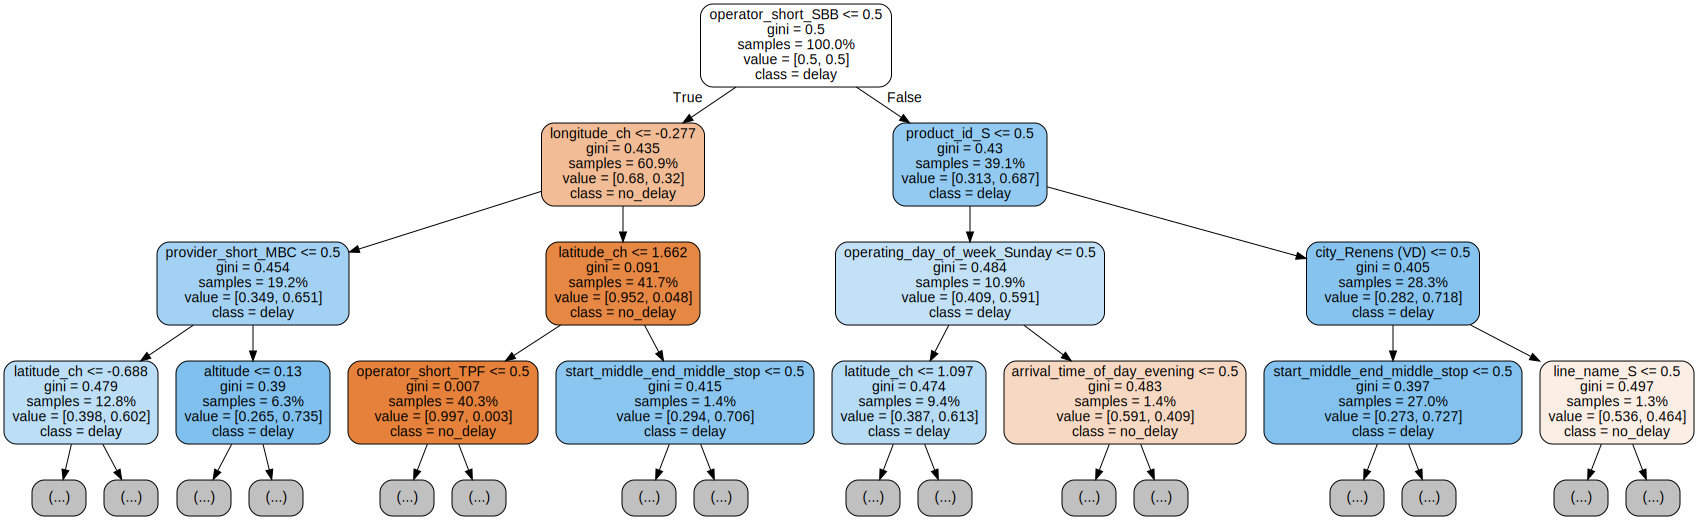

In [81]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree
dot_data = export_graphviz(
    dt_final_d, out_file=None,
    max_depth=3,
    feature_names=df_tr_arr_input_columns, 
    class_names=['no_delay','delay'],
    filled=True, rounded=True, proportion=True)

# Display decision tree
graphviz.Source(dot_data)

#### Important delay (DecisionTree) <a name='dt_imp_delay' /> <a name='dt_imp_delay_grid' />
*<a href=#top>Back to top</a>*

In [82]:
# without class_weight
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import RepeatedStratifiedKFold

# Create decision tree
dt_i = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

balance = [None, {0:1,1:10}, 'balanced', {0:1,1:500}]
trees = [3,5,7,9,11]
param_grid = dict(class_weight=balance, max_depth=trees)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scoring = ['precision','recall','average_precision','f1']
# define grid search
grid_dt_i = GridSearchCV(estimator=dt_i, param_grid=param_grid, n_jobs=-1, cv=5, scoring=scoring, refit=False, return_train_score=True)
# fit
grid_dt_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [None, {0: 1, 1: 10}, 'balanced',
                                          {0: 1, 1: 500}],
                         'max_depth': [3, 5, 7, 9, 11]},
             refit=False, return_train_score=True,
             scoring=['precision', 'recall', 'average_precision', 'f1'])

In [83]:
# Get the results with "cv_results"
grid_dt_i.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_class_weight', 'param_max_depth', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision', 'split2_train_precision', 'split3_train_precision', 'split4_train_precision', 'mean_train_precision', 'std_train_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_train_recall', 'split1_train_recall', 'split2_train_recall', 'split3_train_recall', 'split4_train_recall', 'mean_train_recall', 'std_train_recall', 'split0_test_average_precision', 'split1_test_average_precision', 'split2_test_average_precision', 'split3_test_average_precision', 'split4_test_average_precision', 'mean_te

In [84]:
grid_dt_i.cv_results_['mean_test_f1']

array([0.07108861, 0.10626231, 0.10555651, 0.10952679, 0.12957206,
       0.17949642, 0.22992921, 0.19915481, 0.23232697, 0.2256163 ,
       0.15426296, 0.17591529, 0.1762475 , 0.18412881, 0.19536847,
       0.1466481 , 0.15357783, 0.15700178, 0.15750067, 0.15993078])

In [85]:
cols = ['mean_test_average_precision','mean_train_average_precision','std_test_average_precision',\
        'mean_test_f1','mean_train_f1',\
        'mean_test_recall','mean_train_recall','mean_test_precision','mean_train_precision',\
        'param_max_depth','param_class_weight',\
        'mean_fit_time','mean_score_time']
# Delay GridSearchCV
grid_dt_df_i = pd.DataFrame(grid_dt_i.cv_results_)[cols].sort_values(by='mean_test_average_precision', ascending=False)
grid_dt_df_i

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_max_depth,param_class_weight,mean_fit_time,mean_score_time
4,0.199899,0.383682,0.072548,0.129572,0.228174,0.079701,0.135307,0.405887,0.765003,11,None,28.074581,0.503927
13,0.193977,0.307361,0.069905,0.184129,0.231847,0.795130,0.921369,0.104343,0.132617,9,balanced,22.258346,0.489962
3,0.193955,0.335905,0.076232,0.109527,0.196422,0.063741,0.114334,0.439056,0.805041,9,None,26.597215,0.545439
8,0.193319,0.324783,0.064883,0.232327,0.313080,0.519573,0.680729,0.151243,0.203549,9,"{0: 1, 1: 10}",22.807055,0.474027
12,0.188240,0.261417,0.079509,0.176248,0.212782,0.854512,0.917401,0.098375,0.120538,7,balanced,20.910563,0.527060
14,0.186410,0.345853,0.068069,0.195368,0.262491,0.680495,0.903740,0.114300,0.153689,11,balanced,22.707811,0.509347
7,0.185805,0.271268,0.075777,0.199155,0.282361,0.523760,0.685993,0.126517,0.181377,7,"{0: 1, 1: 10}",22.893670,0.480742
9,0.185518,0.366257,0.066810,0.225616,0.328961,0.522429,0.730832,0.145435,0.213339,11,"{0: 1, 1: 10}",23.061724,0.475922
2,0.183939,0.279622,0.076683,0.105557,0.169163,0.059909,0.096527,0.530213,0.811791,7,None,24.938460,0.526406
1,0.182806,0.223289,0.078234,0.106262,0.131155,0.059106,0.071543,0.637769,0.820056,5,None,22.169120,0.501666


#### Classification report (DecisionTree - Importat delay) <a name='dt_imp_delay_report' />
*<a href=#top>Back to top</a>*

In [86]:
# going with (9) because high AP, high f1 and high recall
dt_final_i = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=0, class_weight='balanced')
dt_final_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)
y_pred_dt_va_final_i = dt_final_i.predict(X_va_arr_reindex) # prediction delay
print('Classification report: DecisionTree important delay')
report_dt_final_i= classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=y_pred_dt_va_final_i, target_names=['no_delay','important_delay'])
print(report_dt_final_i)

Classification report: DecisionTree important delay
                 precision    recall  f1-score   support

       no_delay       0.98      0.61      0.75    103481
important_delay       0.10      0.81      0.17      5239

       accuracy                           0.62    108720
      macro avg       0.54      0.71      0.46    108720
   weighted avg       0.94      0.62      0.73    108720



#### Visualize Decision Tree of depth 3 (DecisionTree - Important delay) <a name='dt_imp_delay_viz' />
*<a href=#top>Back to top</a>*

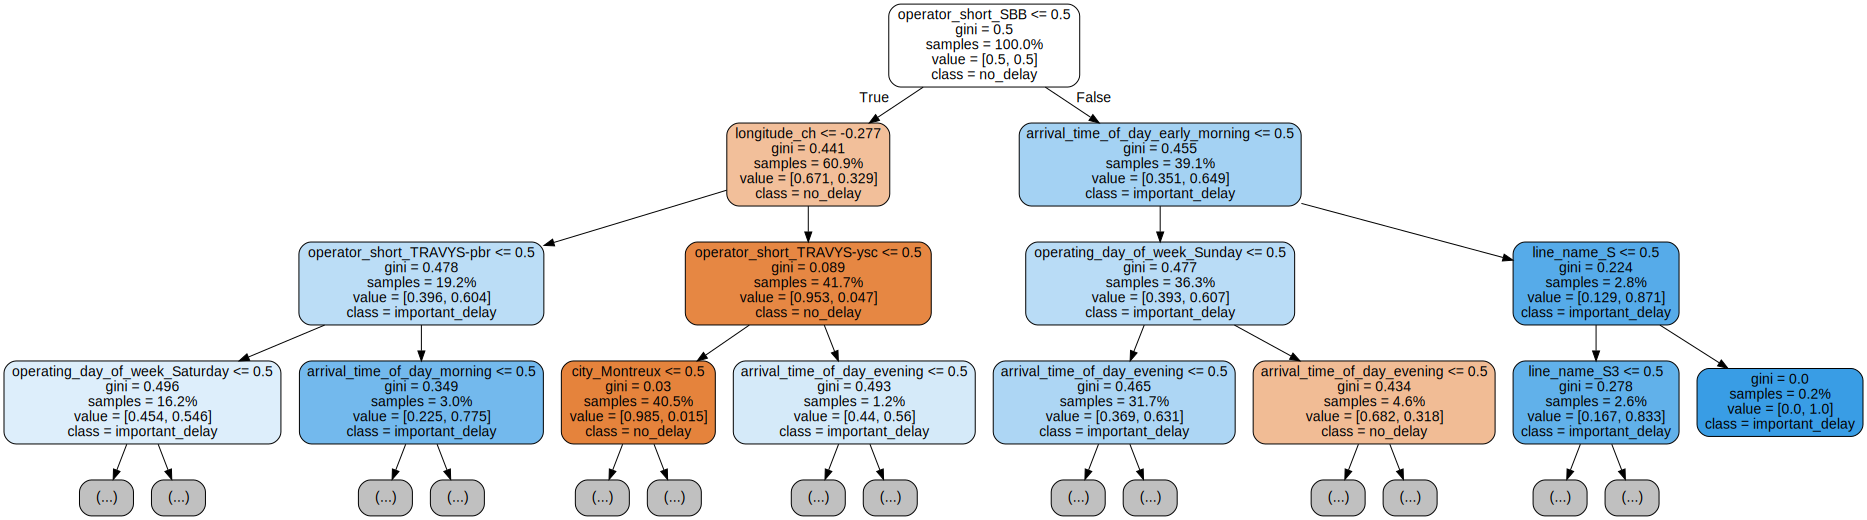

In [87]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree
dot_data_i = export_graphviz(
    dt_final_i, out_file=None,
    max_depth=3,
    feature_names=df_tr_arr_input_columns, 
    class_names=['no_delay','important_delay'],
    filled=True, rounded=True, proportion=True)

# Display decision tree
graphviz.Source(dot_data_i)
# maybe want to only consider non-balanced for DecisionTree ti make understanding predition more readable?

**Comments DecisionTree:**
* Interesting to be able to visualize trees but not really readable in this case when there are so many dimensions
* Overall good performance with f1 socres at 0.54 and 0.17 but slightly below LogisticRegression and SVC Linear Especially high recall which means many false positive

#### Performance on test set (DecisionTree Linear) <a name='dt_test' />
*<a href=#top>Back to top</a>*

In [254]:
# delay
dt_test_probs_pos_d = dt_final_d.predict_proba(X_te_arr_reindex)[:,1]
dt_precision_test_d, dt_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, dt_test_probs_pos_d, pos_label=1)
dt_test_auc_pr_d = auc(dt_recall_test_d, dt_precision_test_d)
print('Area Under PR Curve: {:.3f}'.format(dt_test_auc_pr_d))
# use threshold
y_pred_dt_test_d = dt_final_d.predict(X_te_arr_reindex) # prediction delay
print('Classification report: DecisionTree TEST delay')
report_dt_d= classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_dt_test_d, target_names=['no_delay','delay'])
f1_dt_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_dt_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
precision_dt_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_dt_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['precision']
recall_dt_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=y_pred_dt_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['recall']
print(report_dt_d)

Area Under PR Curve: 0.591
Classification report: DecisionTree TEST delay
              precision    recall  f1-score   support

    no_delay       0.95      0.68      0.79     80088
       delay       0.49      0.88      0.63     27278

    accuracy                           0.73    107366
   macro avg       0.72      0.78      0.71    107366
weighted avg       0.83      0.73      0.75    107366



In [255]:
# important delay
dt_test_probs_pos_i = dt_final_i.predict_proba(X_te_arr_reindex)[:,1]
dt_precision_test_i, dt_recall_test_i, _ = precision_recall_curve(y_te_arr_imp_delay_binary, dt_test_probs_pos_i, pos_label=1)
dt_test_auc_pr_i = auc(dt_recall_test_i, dt_precision_test_i)
print('Area Under PR Curve: {:.3f}'.format(dt_test_auc_pr_i))
# use threshold
y_pred_dt_test_i = dt_final_i.predict(X_te_arr_reindex) # prediction delay
print('Classification report: DecisionTree TEST important delay')
report_dt_i= classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_dt_test_i, target_names=['no_delay','important_delay'])
f1_dt_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_dt_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_dt_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_dt_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_dt_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=y_pred_dt_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_dt_i)

Area Under PR Curve: 0.256
Classification report: DecisionTree TEST important delay
                 precision    recall  f1-score   support

       no_delay       0.98      0.62      0.76    100362
important_delay       0.13      0.78      0.22      7004

       accuracy                           0.63    107366
      macro avg       0.55      0.70      0.49    107366
   weighted avg       0.92      0.63      0.72    107366



#### RandomForest <a name='rf' />
*<a href=#top>Back to top</a>*
#### Delay <a name='rf_delay' /> <a name='rf_delay_grid' />

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
# create RandomForest
forest_d = RandomForestClassifier()
# parameters
balance_rf = [None, 'balanced', 'balanced_subsample']
trees_rf = [3,5,7,9,11]
estimators_rf = [1,3,5,7,9,11,13,15]
param_grid_rf = dict(class_weight=balance_rf, max_depth=trees_rf, n_estimators=estimators_rf)
# define GridSearchCV
scoring = ['precision','recall','average_precision','f1']
grid_rf_d = GridSearchCV(estimator=forest_d, param_grid=param_grid_rf, n_jobs=-1, cv=5, scoring=scoring, refit=False, return_train_score=True)
# fit
grid_rf_d.fit(X_tr_arr, y_tr_arr_delay_binary)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15]},
             refit=False, return_train_score=True,
             scoring=['precision', 'recall', 'average_precision', 'f1'])

In [92]:
# Get the results with "cv_results"
grid_rf_d.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_class_weight', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision', 'split2_train_precision', 'split3_train_precision', 'split4_train_precision', 'mean_train_precision', 'std_train_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_train_recall', 'split1_train_recall', 'split2_train_recall', 'split3_train_recall', 'split4_train_recall', 'mean_train_recall', 'std_train_recall', 'split0_test_average_precision', 'split1_test_average_precision', 'split2_test_average_precision', 'split3_test_average_precision', 'split4_test_averag

In [93]:
grid_rf_d.cv_results_['mean_test_f1'][1:10]

array([0.03210183, 0.01840588, 0.01249549, 0.01389192, 0.00128669,
       0.        , 0.00493679, 0.11833582, 0.07352153])

In [94]:
cols = ['mean_test_average_precision','mean_train_average_precision','std_test_average_precision',\
        'mean_test_f1','mean_train_f1',\
        'mean_test_recall','mean_train_recall','mean_test_precision','mean_train_precision',\
        'param_max_depth','param_n_estimators','param_class_weight',\
        'mean_fit_time','mean_score_time']
# Delay GridSearchCV
grid_rf_df_d = pd.DataFrame(grid_rf_d.cv_results_)[cols].sort_values(by='mean_test_f1', ascending=False)
grid_rf_df_d.head(20)

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_max_depth,param_n_estimators,param_class_weight,mean_fit_time,mean_score_time
117,0.509801,0.605363,0.068372,0.567645,0.568688,0.957989,0.969250,0.403891,0.402465,11,11,balanced_subsample,19.264324,0.795781
114,0.531043,0.593525,0.045520,0.566198,0.574916,0.951235,0.964769,0.403333,0.409528,11,5,balanced_subsample,10.713417,0.701610
79,0.520073,0.611108,0.069928,0.565769,0.571288,0.952395,0.961092,0.402843,0.406692,11,15,balanced,21.762269,0.965477
119,0.518269,0.617490,0.065305,0.565760,0.572682,0.958905,0.973319,0.401347,0.405817,11,15,balanced_subsample,22.019253,0.674433
116,0.514527,0.606363,0.066703,0.564995,0.573467,0.950218,0.962551,0.402440,0.408555,11,9,balanced_subsample,18.106232,0.829804
77,0.514533,0.612274,0.077018,0.564903,0.571710,0.954999,0.968339,0.401292,0.405718,11,11,balanced,18.949736,0.878226
76,0.517870,0.609643,0.065371,0.564457,0.572110,0.946088,0.963864,0.402540,0.406883,11,9,balanced,16.383346,0.791699
118,0.501786,0.609121,0.090708,0.564396,0.569620,0.971233,0.982712,0.398110,0.401051,11,13,balanced_subsample,22.920151,0.946035
115,0.513937,0.601914,0.067329,0.564165,0.568453,0.959982,0.974407,0.400077,0.401318,11,7,balanced_subsample,15.984052,0.975893
78,0.512109,0.605628,0.077752,0.564006,0.568020,0.961265,0.974305,0.399210,0.400967,11,13,balanced,21.448375,0.857709


In [95]:
# going with (73) because decent AP, very high f1 and recall, precision similar to other and best 'fit_time'
forest_final_d = RandomForestClassifier(criterion='gini', max_depth=11, n_estimators=3, random_state=0, class_weight='balanced_subsample')
# fit
forest_final_d.fit(X_tr_arr, y_tr_arr_delay_binary)
# predict
y_pred_forest_va_final_d = forest_final_d.predict(X_va_arr_reindex) # prediction delay
# predict probabilities
forest_final_probs_d = forest_final_d.predict_proba(X_va_arr_reindex)
# keep probabilities for the positive outcome only
forest_final_probs_pos_d = forest_final_probs_d[:,1]
# Precision-recall curve metrics
rf_precision_final_d, rf_recall_final_d, rf_thres_final_d = precision_recall_curve(y_va_arr_delay_binary, forest_final_probs_pos_d, pos_label=1)
rf_final_auprc_d = auc(rf_recall_final_d, rf_precision_final_d)
print('Area Under PR Curve: {:.3f}'.format(rf_final_auprc_d))

Area Under PR Curve: 0.487


#### Best threshold (RandomForest - Delay) <a name='rf_delay_thres' />
*<a href=#top>Back to top</a>*

In [96]:
from numpy import argmax
fscores_rf_d = (2 * rf_precision_final_d * rf_recall_final_d) / (rf_precision_final_d + rf_recall_final_d)
rf_bt_d = rf_thres_final_d[argmax(fscores_rf_d)]
print('Best Threshold: {:.3f}'.format(rf_bt_d))
# use threshold in model
rf_final_curve_d = np.where(forest_final_probs_d[:,1] > rf_bt_d, 1,0)
print('Probabilities:',forest_final_probs_d[0:10,1])
print('Predictions:',rf_final_curve_d[0:10])

Best Threshold: 0.608
Probabilities: [0.61799597 0.52203743 0.61799597 0.55905321 0.89401426 0.64835105
 0.71057243 0.71057243 0.71057243 0.71057243]
Predictions: [1 0 1 0 1 1 1 1 1 1]


#### Classification report (RandomForest - Delay) <a name='rf_delay_report' />
*<a href=#top>Back to top</a>*

In [97]:
print('Classification report: RandomForest delay')
report_forest_final_d= classification_report(y_true=y_va_arr_delay_binary, y_pred=rf_final_curve_d, target_names=['no_delay','delay'])
print(report_forest_final_d)

Classification report: RandomForest delay
              precision    recall  f1-score   support

    no_delay       0.91      0.74      0.81     86652
       delay       0.41      0.71      0.52     22068

    accuracy                           0.73    108720
   macro avg       0.66      0.72      0.66    108720
weighted avg       0.81      0.73      0.75    108720



#### Confusion Matrix (RandomForest - Delay) <a name='rf_delay_report' />
*<a href=#top>Back to top</a>*

In [98]:
# Confusion matrix 'RF important delay'
matrix_rf_d = confusion_matrix(y_true=y_va_arr_delay_binary, y_pred=rf_final_curve_d,normalize='all') # normalize either on columns/rows or all
matrix_rf_d = pd.DataFrame(
    matrix_rf_d, 
    columns=['pred: no delay', 'pred: delay'],
    index=['true: no delay', 'true: delay']
)
print('Confusion matrix (normalized): RandomForest delay')
matrix_rf_d

Confusion matrix (normalized): RandomForest delay


,pred: no delay,pred: delay
true: no delay,0.585872,0.211148
true: delay,0.058913,0.144067


#### Important delay <a name='rf_imp_delay' /><a name='rf_imp_delay_grid' />
*<a href=#top>Back to top</a>*

In [99]:
# create RandomForest
forest_i = RandomForestClassifier()
# parameters
balance_rf = [None, 'balanced', 'balanced_subsample']
trees_rf = [3,5,7,9,11]
estimators_rf = [1,3,5,7,9,11,13,15]
param_grid_rf = dict(class_weight=balance_rf, max_depth=trees_rf, n_estimators=estimators_rf)
# define GridSearchCV
scoring = ['precision','recall','average_precision','f1']
grid_rf_i = GridSearchCV(estimator=forest_i, param_grid=param_grid_rf, n_jobs=-1, cv=5, scoring=scoring, refit=False, return_train_score=True)
# fit
grid_rf_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15]},
             refit=False, return_train_score=True,
             scoring=['precision', 'recall', 'average_precision', 'f1'])

In [100]:
# Get the results with "cv_results"
grid_rf_i.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_class_weight', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_train_precision', 'split1_train_precision', 'split2_train_precision', 'split3_train_precision', 'split4_train_precision', 'mean_train_precision', 'std_train_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_train_recall', 'split1_train_recall', 'split2_train_recall', 'split3_train_recall', 'split4_train_recall', 'mean_train_recall', 'std_train_recall', 'split0_test_average_precision', 'split1_test_average_precision', 'split2_test_average_precision', 'split3_test_average_precision', 'split4_test_averag

In [101]:
grid_rf_i.cv_results_['mean_test_f1']

array([3.53405475e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.35046554e-02, 3.36597314e-03, 3.56188780e-04, 1.59786951e-03,
       2.83229814e-02, 3.53356890e-03, 0.00000000e+00, 0.00000000e+00,
       3.56727526e-02, 1.56594735e-02, 3.54893995e-03, 3.65147550e-02,
       1.78094390e-04, 2.41430009e-02, 0.00000000e+00, 2.22222222e-02,
       6.55874835e-02, 7.58866897e-02, 1.77518602e-03, 2.57857586e-02,
       4.46698258e-02, 3.58203521e-02, 3.69687086e-02, 2.48928581e-03,
       5.86512202e-02, 5.92967812e-02, 4.64063417e-02, 5.98698195e-02,
       4.53313146e-02, 6.30075066e-02, 3.94998684e-02, 2.42941591e-02,
       1.53204454e-01, 1.48723808e-01, 1.66223271e-01, 1.65660789e-01,
       1.67274729e-01, 1.67690226e-01, 1.64943394e-01, 1.63369246e-01,
       1.39995943e-01, 1.63984117e-01, 1.69301585e-01, 1.65994164e-01,
       1.70085999e-01, 1.69592741e-01, 1.72188813e-01, 1.72453443e-01,
      

In [102]:
cols = ['mean_test_average_precision','mean_train_average_precision','std_test_average_precision',\
        'mean_test_f1','mean_train_f1',\
        'mean_test_recall','mean_train_recall','mean_test_precision','mean_train_precision',\
        'param_max_depth','param_n_estimators','param_class_weight',\
        'mean_fit_time','mean_score_time']
# Delay GridSearchCV
grid_rf_df_i = pd.DataFrame(grid_rf_i.cv_results_)[cols].sort_values(by='mean_test_f1', ascending=False)
grid_rf_df_i.head(20)

,mean_test_average_precision,mean_train_average_precision,std_test_average_precision,mean_test_f1,mean_train_f1,mean_test_recall,mean_train_recall,mean_test_precision,mean_train_precision,param_max_depth,param_n_estimators,param_class_weight,mean_fit_time,mean_score_time
74,0.168295,0.252143,0.065338,0.178633,0.195484,0.833467,0.911050,0.100084,0.109512,11,5,balanced,9.831347,0.609059
118,0.192001,0.296008,0.067369,0.178016,0.193086,0.876086,0.950588,0.099215,0.107501,11,13,balanced_subsample,20.389284,0.823479
81,0.125873,0.121584,0.023690,0.175829,0.169374,0.747153,0.730210,0.100738,0.096978,3,3,balanced_subsample,5.209566,0.500838
79,0.194746,0.303931,0.086221,0.174727,0.194426,0.839797,0.940559,0.097616,0.108430,11,15,balanced,21.871230,0.911849
77,0.182073,0.288337,0.064492,0.174641,0.197478,0.836582,0.925983,0.097645,0.110542,11,11,balanced,17.510272,0.841967
110,0.164862,0.269002,0.078019,0.174377,0.185634,0.839074,0.890034,0.097572,0.103656,9,13,balanced_subsample,18.485956,0.806917
76,0.168997,0.265954,0.060065,0.173566,0.193580,0.852190,0.934475,0.096695,0.108077,11,9,balanced,14.890866,0.759838
94,0.167534,0.202379,0.067658,0.173427,0.174849,0.819645,0.830123,0.097145,0.097726,5,13,balanced_subsample,13.179725,0.741944
69,0.154186,0.250003,0.062203,0.173065,0.184985,0.873225,0.921615,0.096131,0.102846,9,11,balanced,15.683378,0.799435
114,0.158724,0.247207,0.061817,0.172958,0.193453,0.831058,0.925248,0.096727,0.108244,11,5,balanced_subsample,10.153089,0.609924


In [103]:
# going with (115) because decent AP, highest f1 and high recall, precision similar to other and good 'fit_time'
forest_final_i = RandomForestClassifier(criterion='gini', max_depth=11, n_estimators=7, random_state=0, class_weight='balanced_subsample')
# fit
forest_final_i.fit(X_tr_arr, y_tr_arr_imp_delay_binary)
# predict
y_pred_forest_va_final_i = forest_final_i.predict(X_va_arr_reindex) # prediction delay
# predict probabilities
forest_final_probs_i = forest_final_i.predict_proba(X_va_arr_reindex)
# keep probabilities for the positive outcome only
forest_final_probs_pos_i = forest_final_probs_i[:,1]
# Precision-recall curve metrics
rf_precision_final_i, rf_recall_final_i, rf_thres_final_i = precision_recall_curve(y_va_arr_imp_delay_binary, forest_final_probs_pos_i, pos_label=1)
rf_final_auprc_i = auc(rf_recall_final_i, rf_precision_final_i)
print('Area Under PR Curve: {:.3f}'.format(rf_final_auprc_i))

Area Under PR Curve: 0.210


#### Best threshold (RandomForest - Important delay) <a name='rf_imp_delay_thres' />
*<a href=#top>Back to top</a>*

In [104]:
from numpy import argmax
fscores_rf_i = (2 * rf_precision_final_i * rf_recall_final_i) / (rf_precision_final_i + rf_recall_final_i)
rf_bt_i = rf_thres_final_i[argmax(fscores_rf_i)]
print('Best Threshold: {:.3f}'.format(rf_bt_i))
# use threshold in model
rf_final_curve_i = np.where(forest_final_probs_i[:,1] > rf_bt_i, 1,0)
print('Probabilities:',forest_final_probs_i[0:10,1])
print('Predictions:',rf_final_curve_i[0:10])

Best Threshold: 0.661
Probabilities: [0.59382634 0.59388932 0.63350715 0.63357013 0.6942393  0.64640551
 0.66201457 0.66201457 0.64640551 0.65523314]
Predictions: [0 0 0 0 1 0 1 1 0 0]


#### Classification report (RandomForest - Important delay) <a name='rf_imp_delay_report' />
*<a href=#top>Back to top</a>*

In [105]:
print('Classification report: RandomForest important delay')
report_forest_final_i= classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=rf_final_curve_i, target_names=['no_delay','important_delay'])
print(report_forest_final_i)

Classification report: RandomForest important delay
                 precision    recall  f1-score   support

       no_delay       0.96      0.94      0.95    103481
important_delay       0.22      0.32      0.26      5239

       accuracy                           0.91    108720
      macro avg       0.59      0.63      0.61    108720
   weighted avg       0.93      0.91      0.92    108720



#### Confusion Matrix (RandomForest - Important delay) <a name='rf_imp_delay_matrix' />
*<a href=#top>Back to top</a>*

In [106]:
# Confusion matrix 'RF important delay'
matrix_rf_d = confusion_matrix(y_true=y_va_arr_delay_binary, y_pred=rf_final_curve_i,normalize='all') # normalize either on columns/rows or all
matrix_rf_d = pd.DataFrame(
    matrix_rf_d, 
    columns=['pred: no delay', 'pred: important delay'],
    index=['true: no delay', 'true: important delay']
)
print('Confusion matrix (normalized): RandomForest important delay')
matrix_rf_d

Confusion matrix (normalized): RandomForest important delay


,pred: no delay,pred: important delay
true: no delay,0.75826,0.03876
true: important delay,0.17099,0.03199


#### Multiclass imbalanced (RandomForest) <a name='rf_multi_report' />
*<a href=#top>Back to top</a>*

In [107]:
y_tr_arr_delay_binary

array([1, 1, 1, ..., 0, 0, 0])

In [108]:
y_tr_arr_imp_delay_binary

array([1, 1, 1, ..., 0, 0, 0])

In [109]:
y_tr_arr_delay_multi = y_tr_arr_delay_binary + y_tr_arr_imp_delay_binary
y_va_arr_delay_multi = y_va_arr_delay_binary + y_va_arr_imp_delay_binary
y_te_arr_delay_multi = y_te_arr_delay_binary + y_te_arr_imp_delay_binary

In [110]:
forest_multi = RandomForestClassifier()
# could grid search class_weight
forest_multi.fit(X_tr_arr, y_tr_arr_delay_multi)
forest_multi.score(X_va_arr_reindex, y_va_arr_delay_multi)

0.8031456953642384

In [111]:
# prediction
y_pred_va_forest_multi = forest_multi.predict(X_va_arr_reindex)

#### Classification report (RandomForest - Multiclass) <a name='rf_multi_report' />
*<a href=#top>Back to top</a>*

In [112]:
report_forest_multi = classification_report(y_true=y_va_arr_delay_multi, y_pred=y_pred_va_forest_multi, target_names=['no_delay','delay','important_delay'])
print(report_forest_multi)
# why f1-score better for "important delay" in multi-class over binary?

                 precision    recall  f1-score   support

       no_delay       0.86      0.92      0.89     86652
          delay       0.48      0.42      0.45     16829
important_delay       0.42      0.14      0.21      5239

       accuracy                           0.80    108720
      macro avg       0.59      0.49      0.52    108720
   weighted avg       0.78      0.80      0.79    108720



In [113]:
forest_multi.predict_proba(X_va_arr_reindex)[0:10,:]

array([[0.53532143, 0.        , 0.46467857],
       [0.48022884, 0.01602116, 0.50375   ],
       [0.82444558, 0.17555442, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.2524197 , 0.45168522, 0.29589508],
       [0.69373977, 0.05986292, 0.24639731],
       [0.4803979 , 0.2495473 , 0.27005479],
       [0.40829106, 0.34802075, 0.24368818],
       [0.64545499, 0.1033296 , 0.25121541],
       [0.64655107, 0.10416936, 0.24927957]])

In [114]:
y_pred_va_forest_multi[0:10]

array([0, 2, 0, 0, 1, 0, 0, 0, 0, 0])

In [115]:
forest_final_i.predict_proba(X_va_arr_reindex)[:,1].mean()

0.37286661068985616

In [116]:
y_pred_forest_va_final_i[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Confusion Matrix (RandomForest - Multiclass) <a name='rf_multi_matrix' />
*<a href=#top>Back to top</a>*

In [117]:
# Confusion matrix 'RF multi important delay'
matrix_rf_multi = confusion_matrix(y_true=y_va_arr_delay_multi, y_pred=y_pred_va_forest_multi,normalize='all') # normalize either on columns/rows or all
matrix_rf_multi = pd.DataFrame(
    matrix_rf_multi, 
    columns=['pred: no delay','pred: delay', 'pred: imp delay'],
    index=['true: no delay','pred: delay', 'true: imp delay']
)
print('Confusion matrix (normalized): RandomForest important delay multi')
matrix_rf_multi
# multi class seems to be overperforming on almost all classes

Confusion matrix (normalized): RandomForest important delay multi


,pred: no delay,pred: delay,pred: imp delay
true: no delay,0.730740,0.059796,0.006485
pred: delay,0.086231,0.065508,0.003054
true: imp delay,0.030951,0.010338,0.006898


**Comments (RandomForest):**
* Classifier seems to be performing especially well with the more imbalanced data set, reaching f1 score of 0.26 while f1 score for delay is slightly below other top performing classifiers

#### Performance on test set (RandomForest) <a name='rf_test' />
*<a href=#top>Back to top</a>*

In [256]:
# delay
rf_test_probs_pos_d = forest_final_d.predict_proba(X_te_arr_reindex)[:,1]
rf_precision_test_d, rf_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, rf_test_probs_pos_d, pos_label=1)
rf_test_auc_pr_d = auc(rf_recall_test_d, rf_precision_test_d)
print('Area Under PR Curve: {:.3f}'.format(rf_test_auc_pr_d))
# use threshold
rf_test_d = np.where(forest_final_d.predict_proba(X_te_arr_reindex)[:,1] > rf_bt_d, 1,0)
print('Classification report: RandomForest TEST delay')
report_rf_d= classification_report(y_true=y_te_arr_delay_binary, y_pred=rf_test_d, target_names=['no_delay','delay'])
f1_rf_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=rf_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
precision_rf_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=rf_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['precision']
recall_rf_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=rf_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['recall']
print(report_rf_d)

Area Under PR Curve: 0.583
Classification report: RandomForest TEST delay
              precision    recall  f1-score   support

    no_delay       0.89      0.77      0.82     80088
       delay       0.51      0.71      0.60     27278

    accuracy                           0.75    107366
   macro avg       0.70      0.74      0.71    107366
weighted avg       0.79      0.75      0.76    107366



In [257]:
# important delay
rf_test_probs_pos_i = forest_final_i.predict_proba(X_te_arr_reindex)[:,1]
rf_precision_test_i, rf_recall_test_i, _ = precision_recall_curve(y_te_arr_imp_delay_binary, rf_test_probs_pos_i, pos_label=1)
rf_test_auc_pr_i = auc(rf_recall_test_i, rf_precision_test_i)
print('Area Under PR Curve: {:.3f}'.format(rf_test_auc_pr_i))
# use threshold
rf_test_i = np.where(forest_final_i.predict_proba(X_te_arr_reindex)[:,1] > rf_bt_i, 1,0)
print('Classification report: RandomForest TEST Important delay')
report_rf_i= classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=rf_test_i, target_names=['no_delay','important_delay'])
f1_rf_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=rf_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_rf_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=rf_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_rf_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=rf_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_rf_i)

Area Under PR Curve: 0.263
Classification report: RandomForest TEST Important delay
                 precision    recall  f1-score   support

       no_delay       0.95      0.95      0.95    100362
important_delay       0.29      0.30      0.30      7004

       accuracy                           0.91    107366
      macro avg       0.62      0.63      0.62    107366
   weighted avg       0.91      0.91      0.91    107366



In [230]:
# multiclass delay
y_pred_rf_test_m = forest_multi.predict(X_te_arr_reindex) # prediction delay
print('Classification report: RandomForest TEST Multiclass delay')
report_rf_m= classification_report(y_true=y_te_arr_delay_multi, y_pred=y_pred_rf_test_m, target_names=['no_delay','delay','important_delay'])
f1_rf_test_m = classification_report(y_true=y_te_arr_delay_multi, y_pred=y_pred_rf_test_m, target_names=['no_delay','delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_rf_test_m = classification_report(y_true=y_te_arr_delay_multi, y_pred=y_pred_rf_test_m, target_names=['no_delay','delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_rf_test_m = classification_report(y_true=y_te_arr_delay_multi, y_pred=y_pred_rf_test_m, target_names=['no_delay','delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_rf_m)

Classification report: RandomForest TEST Multiclass delay
                 precision    recall  f1-score   support

       no_delay       0.82      0.93      0.87     80088
          delay       0.54      0.39      0.45     20274
important_delay       0.47      0.12      0.19      7004

       accuracy                           0.78    107366
      macro avg       0.61      0.48      0.50    107366
   weighted avg       0.74      0.78      0.75    107366



### V) Keras (with class_weight) <a name='keras' />
*<a href=#top>Back to top</a>*

In [121]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [122]:
# had to install latest version of tensorflow to get below metrics
# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

metrics = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR'), # precision-recall curve,
      f1_m
]

In [123]:
neg_d, pos_d = np.bincount(y_tr_arr_delay_binary)
total_d = neg_d + pos_d
print('Delay:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_d, pos_d, 100 * pos_d / total_d))
neg_i, pos_i = np.bincount(y_tr_arr_imp_delay_binary)
total_i = neg_i + pos_i
print('Important delay:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_i, pos_i, 100 * pos_i / total_i))

Delay:
    Total: 215050
    Positive: 49154 (22.86% of total)

Important delay:
    Total: 215050
    Positive: 11217 (5.22% of total)



#### Delay <a name='keras_delay' />
*<a href=#top>Back to top</a>*

In [124]:
# Scaling by total/2 to help keep loss to similar magnitude
weight_no_delay_d = (1 / neg_d)*(total_d)/2.0
weight_delay = (1 / pos_d)*(total_d)/2.0

class_weight_d = {0: weight_no_delay_d, 1: weight_delay}

print('Weight for class no_delay: {:.2f}'.format(weight_no_delay_d))
print('Weight for class delay: {:.2f}'.format(weight_delay))

Weight for class no_delay: 0.65
Weight for class delay: 2.19


In [125]:
# class weight model
cw_model = Sequential()
cw_model.add(Dense(16, activation='relu', input_dim=X_tr_arr.shape[1]))
cw_model.add(Dropout(0.5))
cw_model.add(Dense(1, activation='sigmoid', bias_initializer=None))

cw_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='BinaryCrossentropy',
    metrics=metrics)

cw_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                6960      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [126]:
# define if want to add "initial_weights"
# model.load_weights(initial_weights)

#### Fit model (Keras - Delay) <a name='keras_delay_fit' />
*<a href=#top>Back to top</a>*

In [127]:
b_size=2000 # important to be high enough to contain information on positive class
e=30
early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', verbose = 1, patience=10, mode='max', restore_best_weights=True)

cw_history = cw_model.fit(
    x=X_tr_arr, 
    y=y_tr_arr_delay_binary,
    batch_size=b_size,
    epochs=e,
    callbacks=[early_stop],
    validation_data=(X_va_arr_reindex, y_va_arr_delay_binary),
    shuffle=True, # Shuffle training samples
    class_weight=class_weight_d
    )

Epoch 1/30
108/108 [==============================] - 6s 29ms/step - loss: 0.4962 - tp: 22032.1651 - fp: 33898.7798 - tn: 51055.9908 - fn: 2977.2844 - accuracy: 0.6762 - precision: 0.3979 - recall: 0.8233 - auc: 0.8154 - prc: 0.5154 - f1_m: 0.5176 - val_loss: 0.4798 - val_tp: 19937.0000 - val_fp: 31940.0000 - val_tn: 54712.0000 - val_fn: 2131.0000 - val_accuracy: 0.6866 - val_precision: 0.3843 - val_recall: 0.9034 - val_auc: 0.8518 - val_prc: 0.5708 - val_f1_m: 0.4707
Epoch 2/30
108/108 [==============================] - 2s 14ms/step - loss: 0.4427 - tp: 23343.5046 - fp: 34621.3670 - tn: 50146.4587 - fn: 1852.8899 - accuracy: 0.6731 - precision: 0.4074 - recall: 0.9213 - auc: 0.8529 - prc: 0.6009 - f1_m: 0.5673 - val_loss: 0.4640 - val_tp: 19718.0000 - val_fp: 30751.0000 - val_tn: 55901.0000 - val_fn: 2350.0000 - val_accuracy: 0.6955 - val_precision: 0.3907 - val_recall: 0.8935 - val_auc: 0.8509 - val_prc: 0.5681 - val_f1_m: 0.4717
Epoch 3/30
108/108 [==============================] - 

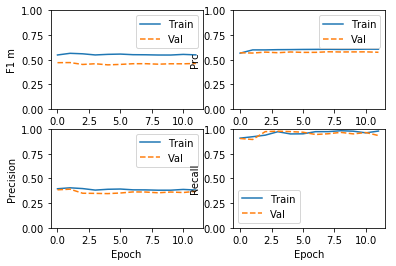

In [128]:
# check training history
def plot_metrics(history):
  metrics = ['f1_m', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

plot_metrics(cw_history)

In [129]:
cw_history.history['val_recall']

[0.9034348130226135,
 0.8935109376907349,
 0.9730831980705261,
 0.9777052998542786,
 0.97344571352005,
 0.9671922922134399,
 0.944036602973938,
 0.9514228701591492,
 0.9655609726905823,
 0.9501540660858154,
 0.9639296531677246,
 0.9333423972129822]

In [130]:
# prediction
y_pred_va_keras_d = cw_model.predict(X_va_arr_reindex)

In [131]:
report_keras_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=(y_pred_va_keras_d > 0.5)*1, target_names=['no_delay','delay'])
print(report_keras_d)

              precision    recall  f1-score   support

    no_delay       0.96      0.65      0.77     86652
       delay       0.39      0.89      0.54     22068

    accuracy                           0.70    108720
   macro avg       0.68      0.77      0.66    108720
weighted avg       0.84      0.70      0.73    108720



In [132]:
# Precision-recall curve metrics
keras_precision_d, keras_recall_d, keras_thres_d = precision_recall_curve(y_va_arr_delay_binary, y_pred_va_keras_d, pos_label=1)
keras_auprc_d = auc(keras_recall_d, keras_precision_d)
print('Area Under PR Curve: {:.3f}'.format(keras_auprc_d))

Area Under PR Curve: 0.568


#### Optimize threshold (Keras - Delay) <a name='keras_delay_thres' />
*<a href=#top>Back to top</a>*

In [133]:
from numpy import argmax
fscores_keras_d = (2 * keras_precision_d * keras_recall_d) / (keras_precision_d + keras_recall_d)
keras_bt_d = keras_thres_d[argmax(fscores_keras_d)]
print('Best Threshold: {:.3f}'.format(keras_bt_d))
# use threshold in model
keras_curve_d = np.where(y_pred_va_keras_d > keras_bt_d, 1,0)
print('Probabilities:',y_pred_va_keras_d[0:10])
print('Predictions:',keras_curve_d[0:10])

Best Threshold: 0.569
Probabilities: [[0.5925672 ]
 [0.54520875]
 [0.5689906 ]
 [0.56060505]
 [0.9215561 ]
 [0.48765883]
 [0.8491559 ]
 [0.9017005 ]
 [0.6197516 ]
 [0.5346859 ]]
Predictions: [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]


#### Classification report (Keras - Delay) <a name='keras_delay_report' />
*<a href=#top>Back to top</a>*

In [134]:
print('Classification report: Keras delay - optimzed threshold at {:.3f} on PR curve'.format(keras_bt_d))
report_keras_preds_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=keras_curve_d, target_names=['no_delay','delay'])
#f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_keras_preds_d)

Classification report: Keras delay - optimzed threshold at 0.569 on PR curve
              precision    recall  f1-score   support

    no_delay       0.92      0.78      0.84     86652
       delay       0.45      0.73      0.56     22068

    accuracy                           0.77    108720
   macro avg       0.69      0.75      0.70    108720
weighted avg       0.82      0.77      0.78    108720



#### Confusion Matrix (Keras - Delay) <a name='keras_delay_matrix' />
*<a href=#top>Back to top</a>*

In [135]:
# Confusion matrix 'RF important delay'
matrix_keras_d = confusion_matrix(y_true=y_va_arr_delay_binary, y_pred=keras_curve_d,normalize='all') # normalize either on columns/rows or all
matrix_keras_d = pd.DataFrame(
    matrix_keras_d, 
    columns=['pred: no delay', 'pred: delay'],
    index=['true: no delay', 'true: delay']
)
print('Confusion matrix (normalized): Keras delay')
matrix_keras_d

Confusion matrix (normalized): Keras delay


,pred: no delay,pred: delay
true: no delay,0.618561,0.178458
true: delay,0.055537,0.147443


#### Important delay <a name='keras_imp_delay' />
*<a href=#top>Back to top</a>*

In [136]:
# Scaling by total/2 to help keep loss to similar magnitude
weight_no_delay_i = (1 / neg_i)*(total_i)/2.0
weight_imp_delay = (1 / pos_i)*(total_i)/2.0

class_weight_i = {0: weight_no_delay_d, 1: weight_imp_delay}

print('Weight for class no_delay: {:.2f}'.format(weight_no_delay_i))
print('Weight for class delay: {:.2f}'.format(weight_imp_delay))

Weight for class no_delay: 0.53
Weight for class delay: 9.59


In [137]:
# class weight model
cw_model_i = Sequential()
cw_model_i.add(Dense(16, activation='relu', input_dim=X_tr_arr.shape[1]))
cw_model_i.add(Dropout(0.5))
cw_model_i.add(Dense(1, activation='sigmoid', bias_initializer=None))

cw_model_i.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='BinaryCrossentropy',
    metrics=metrics)

cw_model_i.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                6960      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [138]:
# define if want to add "initial_weights"
# model.load_weights(initial_weights)

#### Fit model (Keras - Important delay) <a name='keras_imp_delay_fit' />
*<a href=#top>Back to top</a>*

In [139]:
b_size=2000 # important to be high enough to contain information on positive class
e=30
early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', verbose = 1, patience=10, mode='max', restore_best_weights=True)

cw_history_i = cw_model_i.fit(
    x=X_tr_arr, 
    y=y_tr_arr_imp_delay_binary,
    batch_size=b_size,
    epochs=e,
    callbacks=[early_stop],
    validation_data=(X_va_arr_reindex, y_va_arr_imp_delay_binary),
    shuffle=True, # Shuffle training samples
    class_weight=class_weight_i
    )

Epoch 1/30
108/108 [==============================] - 5s 27ms/step - loss: 0.6069 - tp: 25774.9266 - fp: 86551.0826 - tn: 104312.0092 - fn: 2046.2018 - accuracy: 0.6008 - precision: 0.2427 - recall: 0.9267 - auc: 0.8486 - prc: 0.4748 - f1_m: 0.1600 - val_loss: 0.4868 - val_tp: 4330.0000 - val_fp: 46681.0000 - val_tn: 56800.0000 - val_fn: 909.0000 - val_accuracy: 0.5623 - val_precision: 0.0849 - val_recall: 0.8265 - val_auc: 0.7925 - val_prc: 0.2092 - val_f1_m: 0.1339
Epoch 2/30
108/108 [==============================] - 1s 14ms/step - loss: 0.5595 - tp: 5322.7982 - fp: 50153.6789 - tn: 54023.8073 - fn: 463.9358 - accuracy: 0.5354 - precision: 0.0961 - recall: 0.9273 - auc: 0.7949 - prc: 0.2213 - f1_m: 0.1751 - val_loss: 0.5166 - val_tp: 4688.0000 - val_fp: 50842.0000 - val_tn: 52639.0000 - val_fn: 551.0000 - val_accuracy: 0.5273 - val_precision: 0.0844 - val_recall: 0.8948 - val_auc: 0.8008 - val_prc: 0.2158 - val_f1_m: 0.1374
Epoch 3/30
108/108 [==============================] - 2s 14

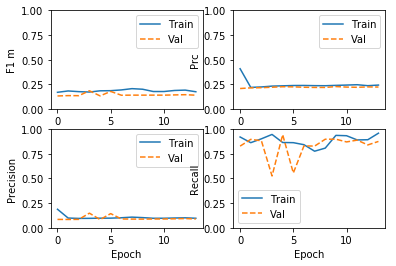

In [140]:
# check training history

plot_metrics(cw_history_i)

In [141]:
cw_history_i.history['val_recall']

[0.8264936208724976,
 0.8948272466659546,
 0.8808932900428772,
 0.5245276093482971,
 0.9421645402908325,
 0.5543042421340942,
 0.8289750218391418,
 0.8266844749450684,
 0.8961634039878845,
 0.8965451717376709,
 0.8688681125640869,
 0.8870013356208801,
 0.8385187983512878,
 0.8738308548927307]

In [142]:
# prediction
y_pred_va_keras_i = cw_model_i.predict(X_va_arr_reindex)

In [143]:
report_keras_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=(y_pred_va_keras_i > 0.5)*1 , target_names=['no_delay','important_delay'])
print(report_keras_i)
# why f1-score better for "important delay" in multi-class over binary?

                 precision    recall  f1-score   support

       no_delay       0.97      0.85      0.91    103481
important_delay       0.15      0.52      0.23      5239

       accuracy                           0.83    108720
      macro avg       0.56      0.69      0.57    108720
   weighted avg       0.93      0.83      0.87    108720



In [144]:
# Precision-recall curve metrics
keras_precision_i, keras_recall_i, keras_thres_i = precision_recall_curve(y_va_arr_imp_delay_binary, y_pred_va_keras_i, pos_label=1)
keras_auprc_i = auc(keras_recall_i, keras_precision_i)
print('Area Under PR Curve: {:.3f}'.format(keras_auprc_i))

Area Under PR Curve: 0.226


#### Optimize threshold (Keras - Important delay) <a name='keras_imp_delay_thres' />
*<a href=#top>Back to top</a>*

In [145]:
from numpy import argmax
fscores_keras_i = (2 * keras_precision_i * keras_recall_i) / (keras_precision_i + keras_recall_i)
keras_bt_i = keras_thres_i[argmax(fscores_keras_i)]
print('Best Threshold: {:.3f}'.format(keras_bt_i))
# use threshold in model
keras_curve_i = np.where(y_pred_va_keras_i > keras_bt_i, 1,0)
print('Probabilities:',y_pred_va_keras_i[0:10])
print('Predictions:',keras_curve_i[0:10])

Best Threshold: 0.604
Probabilities: [[0.49247447]
 [0.492954  ]
 [0.5895435 ]
 [0.59583604]
 [0.728505  ]
 [0.5253348 ]
 [0.6661505 ]
 [0.6897077 ]
 [0.5935712 ]
 [0.5493499 ]]
Predictions: [[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]


#### Classification report (Keras - Important delay) <a name='keras_imp_delay_report' />
*<a href=#top>Back to top</a>*

In [146]:
print('Classification report: Keras delay - optimzed threshold at {:.3f} on PR curve'.format(keras_bt_i))
report_keras_preds_i = classification_report(y_true=y_va_arr_imp_delay_binary, y_pred=keras_curve_i, target_names=['no_delay','important_delay'])
#f1_logreg_pr_d = classification_report(y_true=y_va_arr_delay_binary, y_pred=lr_curve_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
print(report_keras_preds_i)

Classification report: Keras delay - optimzed threshold at 0.604 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.96      0.94      0.95    103481
important_delay       0.22      0.32      0.26      5239

       accuracy                           0.91    108720
      macro avg       0.59      0.63      0.61    108720
   weighted avg       0.93      0.91      0.92    108720



#### Confusion Matrix (Keras - Important delay) <a name='keras_imp_delay_matrix' />
*<a href=#top>Back to top</a>*

In [147]:
# Confusion matrix 'RF important delay'
matrix_keras_i = confusion_matrix(y_true=y_va_arr_imp_delay_binary, y_pred=keras_curve_i,normalize='all') # normalize either on columns/rows or all
matrix_keras_i = pd.DataFrame(
    matrix_keras_i, 
    columns=['pred: no delay', 'pred: important_delay'],
    index=['true: no delay', 'true: important_delay']
)
print('Confusion matrix (normalized): Keras Important delay')
matrix_keras_d

Confusion matrix (normalized): Keras Important delay


,pred: no delay,pred: delay
true: no delay,0.618561,0.178458
true: delay,0.055537,0.147443


**Comments (Keras):**
* Model seems to be able to capture patterns from early iterations/epochs and has therefore low improvements (as can be seen on 4-box line graphs)
* Overall strong performance on both delay and important delay with high f1 scores on par with best classifiers at 0.56 and 0.23

#### Performance on test set (Keras) <a name='keras_test' />
*<a href=#top>Back to top</a>*

In [262]:
# delay
keras_test_probs_pos_d = cw_model.predict(X_te_arr_reindex)
keras_precision_test_d, keras_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, keras_test_probs_pos_d, pos_label=1)
keras_test_auc_pr_d = auc(keras_recall_test_d, keras_precision_test_d)
print('Area Under PR Curve: {:.3f}'.format(keras_test_auc_pr_d))
# use threshold in model
keras_test_d = np.where(cw_model.predict(X_te_arr_reindex) > keras_bt_d, 1,0) # with Keras 'predict' gives probability (shouldn't use 'predict_proba')
print('Probabilities:',cw_model.predict(X_te_arr_reindex)[0:10])
print('Predictions:',keras_test_d[0:10])
print('Classification report: Keras delay TEST - optimzed threshold at {:.3f} on PR curve'.format(keras_bt_d))
report_keras_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=keras_test_d, target_names=['no_delay','delay'])
f1_keras_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=keras_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['f1-score']
precision_keras_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=keras_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['precision']
recall_keras_test_d = classification_report(y_true=y_te_arr_delay_binary, y_pred=keras_test_d, target_names=['no_delay','delay'], output_dict=True)['delay']['recall']
print(report_keras_test_d)

Area Under PR Curve: 0.647
Probabilities: [[0.5925672 ]
 [0.54520875]
 [0.5689906 ]
 [0.56060505]
 [0.9215561 ]
 [0.48765883]
 [0.8491559 ]
 [0.9017005 ]
 [0.6197516 ]
 [0.5346859 ]]
Predictions: [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
Classification report: Keras delay TEST - optimzed threshold at 0.569 on PR curve
              precision    recall  f1-score   support

    no_delay       0.89      0.80      0.84     80088
       delay       0.55      0.71      0.62     27278

    accuracy                           0.78    107366
   macro avg       0.72      0.76      0.73    107366
weighted avg       0.80      0.78      0.79    107366



In [264]:
# important delay
keras_test_probs_pos_i = cw_model_i.predict(X_te_arr_reindex)
keras_precision_test_i, keras_recall_test_i, _ = precision_recall_curve(y_te_arr_imp_delay_binary, keras_test_probs_pos_i, pos_label=1)
keras_test_auc_pr_i = auc(keras_recall_test_i, keras_precision_test_i)
print('Area Under PR Curve: {:.3f}'.format(keras_test_auc_pr_i))
# use threshold in model
keras_test_i = np.where(cw_model_i.predict(X_te_arr_reindex) > keras_bt_i, 1,0) # with Keras 'predict' gives probability (shouldn't use 'predict_proba')
print('Probabilities:',cw_model_i.predict(X_te_arr_reindex)[0:10])
print('Predictions:',keras_test_i[0:10])
print('Classification report: Keras important delay TEST - optimzed threshold at {:.3f} on PR curve'.format(keras_bt_i))
report_keras_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=keras_test_i, target_names=['no_delay','important_delay'])
f1_keras_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=keras_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['f1-score']
precision_keras_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=keras_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['precision']
recall_keras_test_i = classification_report(y_true=y_te_arr_imp_delay_binary, y_pred=keras_test_i, target_names=['no_delay','important_delay'], output_dict=True)['important_delay']['recall']
print(report_keras_test_i)

Area Under PR Curve: 0.288
Probabilities: [[0.49247447]
 [0.492954  ]
 [0.5895435 ]
 [0.59583604]
 [0.728505  ]
 [0.5253348 ]
 [0.6661505 ]
 [0.6897077 ]
 [0.5935712 ]
 [0.5493499 ]]
Predictions: [[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
Classification report: Keras important delay TEST - optimzed threshold at 0.604 on PR curve
                 precision    recall  f1-score   support

       no_delay       0.95      0.95      0.95    100362
important_delay       0.30      0.33      0.31      7004

       accuracy                           0.91    107366
      macro avg       0.63      0.64      0.63    107366
   weighted avg       0.91      0.91      0.91    107366



## Final comparison and comments
*<a href=#top>Back to top</a>*

### Final comments
- **F1 scores:**
    * Delay: 
        * Two classifiers (k-NN untuned and RandomForest) are under-performing slightly
        * All other clasifiers are reaching almost same f1 score ~0.63 with LogisticRegression reaching the highest score at 0.635
        * From all classifiers performing well, Keras is the one with the best balance between precision (0.55) and recall (0.71)
    * Important delay:
        * Two classifiers (k-NN untuned and DecisionTree) are under-performing slightly
        * All other clasifiers are reaching almost same f1 score ~0.30 with Keras reaching the highest score at 0.313
        * From all classifiers performing well LogisticRegression, RandomForest and Keras have the strongest balance between precision and recall (0.55)
- **Area under Precision-Recall:**
    * Delay:
        * Baseline (0.25) is largely over-performed by all classifiers (0.58 to 0.64)
        * SVC Linear and LogisticRegression achieve the highest AUC with 0.652, Keras is very second with 0.647
    * Important delay: 
        * Baseline (0.06) is largely over-performed by all classifiers (0.22 to 0.29)
        * Keras achieves the highst AUC with 0.288, SVC Linear (0.281) very close


* **Overall comment:** link back to initial question. How often trains are delay at arrival? Is it possible to predict?
    * Classifiers: Keras, LogisticRegression and Linear SVC seem to be over-performing other classifiers on those tasks and getting very close results one to another. DecisionTree and RandomForest have good results on train-validatoin sets but seems to have over-fitting impacting performance on test set. K-NN achieves good performance given the fact is has not been tuned.
    * Optimization: hyper-parameters (incl. class_weight) tuning and threshold optimization prove to have significant impact on final performance of the models
    * Preditions: Overall performance relatively low with precision and recall between 0.5 and 0.7 seems to indicate there are limited number of patterns to extract from the data to perdict delay. This would indicate that delays are not a systematic issues in some connection, don't happen frequently on same connection and are therefore relatively hard to precit
    

- **Limitations and additional steps:**
    * Limitation - scope: would have needed to use more data points to get to better models. It seems there was very few patterns to identify from 2-3 weeks of data (which probably indicates that delays on swiss trian network is rather rare and not frequent on same lines). Could have limited to even smaller scope but include 2-3 months of data.
    * Limitation - features: additional feature engineering or external data points could have helped enhanced a data set which had alsmot only categorical variables
    * Additional steps: didn't cover over- and under-sampling which would also improve performance
    * Alternative steps: could have thought of aggregating data and buildling model for example at "stop" level instead of each connections. This could have allowed to take into consideration data for a longer time period
    



### Final comparison <a name='final' />
*<a href=#top>Back to top</a>*

#### F1 scores <a name='final_f1' />

In [150]:
print('DELAY - F1 SCORE')
print('LogisticRegression - delay: {:.3f}'.format(f1_logreg_test_d))
print('k-nn - delay: {:.3f}'.format(f1_knn_test_d))
print('SVC Linear - delay: {:.3f}'.format(f1_svc_test_d))
print('DecisionTree - delay: {:.3f}'.format(f1_dt_test_d))
print('RandomForest - delay: {:.3f}'.format(f1_rf_test_d))
print('Keras - delay: {:.3f}'.format(f1_keras_test_d))
print('***')
print('IMPORTANT DELAY - F1 SCORE')
print('LogisticRegression - important delay: {:.3f}'.format(f1_logreg_test_i))
print('k-nn - important delay: {:.3f}'.format(f1_knn_test_i))
print('SVC Linear - important delay: {:.3f}'.format(f1_svc_test_i))
print('DecisionTree - important delay: {:.3f}'.format(f1_dt_test_i))
print('RandomForest - important delay: {:.3f}'.format(f1_rf_test_i))
print('Keras - important delay: {:.3f}'.format(f1_keras_test_i))

DELAY - F1 SCORE
LogisticRegression - delay: 0.635
k-nn - delay: 0.537
SVC Linear - delay: 0.628
DecisionTree - delay: 0.627
RandomForest - delay: 0.595
Keras - delay: 0.620
***
IMPORTANT DELAY - F1 SCORE
LogisticRegression - important delay: 0.298
k-nn - important delay: 0.163
SVC Linear - important delay: 0.322
DecisionTree - important delay: 0.216
RandomForest - important delay: 0.296
Keras - important delay: 0.313


### bar charts comparison on f1, precision and recall <a name='final_bar' />
*<a href=#top>Back to top</a>*

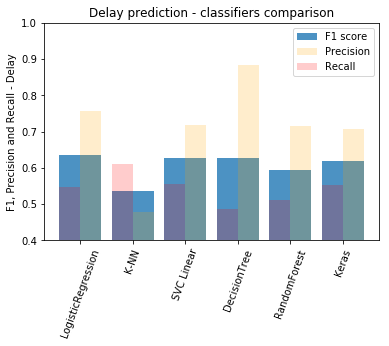

In [242]:
x_f1=[1,2,3,4,5,6]
x_precision = []
for x_p in x_f1: x_precision.append(x_p + 0.2)
x_recall = []
for x_r in x_f1: x_recall.append(x_r - 0.2)
    
h_f1_d = [f1_logreg_test_d,f1_knn_test_d,f1_svc_test_d,f1_dt_test_d,f1_rf_test_d,f1_keras_test_d]
h_precision_d = [precision_logreg_test_d,precision_knn_test_d,precision_svc_test_d,precision_dt_test_d,precision_rf_test_d,precision_keras_test_d]
h_recall_d = [recall_logreg_test_d,recall_knn_test_d,recall_svc_test_d,recall_dt_test_d,recall_rf_test_d,recall_keras_test_d]

plt.bar(x=x_f1, height=h_f1_d, label='F1 score', alpha=0.8)
plt.bar(x=x_precision, height=h_recall_d, color='orange', alpha=0.2, width=0.4, label='Precision')
plt.bar(x=x_recall, height=h_precision_d, color='red', alpha=0.2, width=0.4, label='Recall')
plt.xticks(ticks=[1,2,3,4,5,6],labels=['LogisticRegression','K-NN','SVC Linear','DecisionTree','RandomForest','Keras'], rotation=70)
plt.ylabel('F1, Precision and Recall - Delay')
plt.ylim((0.4,1))
plt.title('Delay prediction - classifiers comparison')
plt.legend()
plt.show()

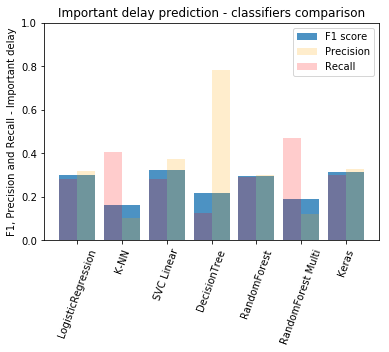

In [271]:
x_f1=[1,2,3,4,5,6,7]
x_precision = []
for x_p in x_f1: x_precision.append(x_p + 0.2)
x_recall = []
for x_r in x_f1: x_recall.append(x_r - 0.2)
    
h_f1_i = [f1_logreg_test_i,f1_knn_test_i,f1_svc_test_i,f1_dt_test_i,f1_rf_test_i,f1_rf_test_m,f1_keras_test_i]
h_precision_i = [precision_logreg_test_i,precision_knn_test_i,precision_svc_test_i,precision_dt_test_i,precision_rf_test_i,precision_rf_test_m,precision_keras_test_i]
h_recall_i = [recall_logreg_test_i,recall_knn_test_i,recall_svc_test_i,recall_dt_test_i,recall_rf_test_i,recall_rf_test_m,recall_keras_test_i]

plt.bar(x=x_f1, height=h_f1_i, label='F1 score', alpha=0.8)
plt.bar(x=x_precision, height=h_recall_i, color='orange', alpha=0.2, width=0.4, label='Precision')
plt.bar(x=x_recall, height=h_precision_i, color='red', alpha=0.2, width=0.4, label='Recall')
plt.xticks(ticks=[1,2,3,4,5,6,7],labels=['LogisticRegression','K-NN','SVC Linear','DecisionTree','RandomForest','RandomForest Multi','Keras'], rotation=70)
plt.ylabel('F1, Precision and Recall - Important delay')
plt.ylim((0,1))
plt.title('Important delay prediction - classifiers comparison')
plt.legend()
plt.show()
# have area under curve directly after name of classifier?

#### Area under precision-recall cuvre comparison <a name='final_auprc' />
*<a href=#top>Back to top</a>*
<br>*<a href=#logreg_a_pr>Initial area under pr curve</a>*

In [267]:
## probably still needs to be calculated for test test for all classifiers 

print('DELAY - AUPRC')
print('LogisticRegression - delay: {:.3f}'.format(lr_test_auc_pr_d)) # on validation data
print('k-nn - delay: {:.3f}'.format(knn_test_auc_pr_d))
print('SVC Linear - delay: {:.3f}'.format(svc_test_auc_pr_d))
print('DecisionTree - delay: {:.3f}'.format(dt_test_auc_pr_d))
print('RandomForest - delay: {:.3f}'.format(rf_test_auc_pr_d))
print('Keras - delay: {:.3f}'.format(keras_test_auc_pr_d))
print('***')
print('IMPORTANT DELAY - AUPRC')
print('LogisticRegression - important delay: {:.3f}'.format(lr_test_auc_pr_i)) # on validation data
print('k-nn - important delay: {:.3f}'.format(knn_test_auc_pr_i))
print('SVC Linear - important delay: {:.3f}'.format(svc_test_auc_pr_i))
print('DecisionTree - important delay: {:.3f}'.format(dt_test_auc_pr_i))
print('RandomForest - important delay: {:.3f}'.format(rf_test_auc_pr_i))
print('Keras - important delay: {:.3f}'.format(keras_test_auc_pr_i))

DELAY - AUPRC
LogisticRegression - delay: 0.652
k-nn - delay: 0.610
SVC Linear - delay: 0.652
DecisionTree - delay: 0.591
RandomForest - delay: 0.583
Keras - delay: 0.647
***
IMPORTANT DELAY - AUPRC
LogisticRegression - important delay: 0.270
k-nn - important delay: 0.223
SVC Linear - important delay: 0.281
DecisionTree - important delay: 0.256
RandomForest - important delay: 0.263
Keras - important delay: 0.288


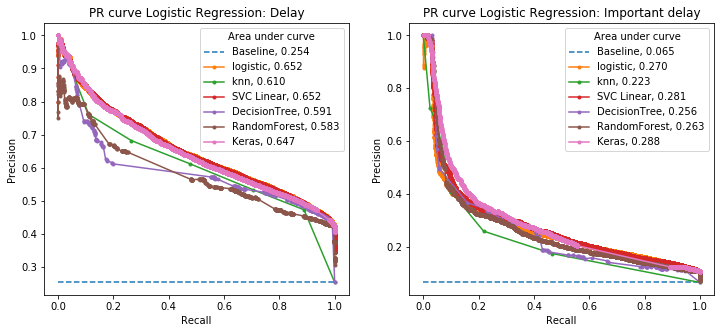

In [269]:
# plot the precision-recall curves for all models on test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

lr_precision_test_d, lr_recall_test_d, _ = precision_recall_curve(y_te_arr_delay_binary, lr_test_probs_pos_d, pos_label=1)
lr_test_auc_pr_d

ax1.plot([0,1], [(27278/107366),(27278/107366)], linestyle='--', label='Baseline, {:.3f}'.format(27278/107366))  # baseline is share of positive classes
ax1.plot(lr_recall_test_d, lr_precision_test_d, marker='.', label='logistic, {:.3f}'.format(lr_test_auc_pr_d))
ax1.plot(knn_recall_test_d, knn_precision_test_d, marker='.', label='knn, {:.3f}'.format(knn_test_auc_pr_d))
ax1.plot(svc_recall_test_d, svc_precision_test_d, marker='.', label='SVC Linear, {:.3f}'.format(svc_test_auc_pr_d))
ax1.plot(dt_recall_test_d, dt_precision_test_d, marker='.', label='DecisionTree, {:.3f}'.format(dt_test_auc_pr_d))
ax1.plot(rf_recall_test_d, rf_precision_test_d, marker='.', label='RandomForest, {:.3f}'.format(rf_test_auc_pr_d))
ax1.plot(keras_recall_test_d, keras_precision_test_d, marker='.', label='Keras, {:.3f}'.format(keras_test_auc_pr_d))
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.legend(title='Area under curve')
ax1.set_title('PR curve: Delay')

ax2.plot([0,1], [(7004/107366),(7004/107366)], linestyle='--', label='Baseline, {:.3f}'.format(7004/107366))  # baseline is share of positive classes
ax2.plot(lr_recall_test_i, lr_precision_test_i, marker='.', label='logistic, {:.3f}'.format(lr_test_auc_pr_i))
ax2.plot(knn_recall_test_i, knn_precision_test_i, marker='.', label='knn, {:.3f}'.format(knn_test_auc_pr_i))
ax2.plot(svc_recall_test_i, svc_precision_test_i, marker='.', label='SVC Linear, {:.3f}'.format(svc_test_auc_pr_i))
ax2.plot(dt_recall_test_i, dt_precision_test_i, marker='.', label='DecisionTree, {:.3f}'.format(dt_test_auc_pr_i))
ax2.plot(rf_recall_test_i, rf_precision_test_i, marker='.', label='RandomForest, {:.3f}'.format(rf_test_auc_pr_i))
ax2.plot(keras_recall_test_i, keras_precision_test_i, marker='.', label='Keras, {:.3f}'.format(keras_test_auc_pr_i))
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(title='Area under curve')
ax2.set_title('PR curve: Important delay')

plt.show()

In [1]:
# Note: incorrect title above, please ignore 'Logistic Regression'